<img src="data/header.png" width=100%>

Welcome to the Midterm Project! Projects in DSC 10 are similar in format to homeworks, but are different in a few key ways. First, a project is comprehensive, meaning that it draws upon everything we've learned this quarter so far. Second, since problems can vary quite a bit in difficulty, some problems will be worth more points than others. Finally, in a project, the problems are more open-ended; they will usually ask for some result, but won't tell you what method should be used to get it. There might be several equally-valid approaches, and several steps might be necessary. This is closer to how data science is done in "real life."

It is important that you **start early** on the project! It will take the place of a homework in the week that it is due, but you should also expect it to take longer than a homework. You are especially encouraged to **find a partner** to work through the project with. If you work with a partner, you must follow the [Pair Programming Guidelines](https://dsc10.com/pair-programming/) on the course website. In particular, you must work together at the same time, and you are not allowed to split up the problems and each work on certain problems. If you work with a partner, only one of you needs to upload your notebook to Gradescope; after uploading, you'll see an option to add the other partner to the submission.

**Important:** The `otter` tests don't usually tell you that your answer is correct. More often, they help catch basic mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). Directly sharing answers between groups is not okay, but discussing problems with the course staff or with other students is encouraged.

**Avoid looping through DataFrames. Do not import any packages.** Loops in Python are slow, and looping through DataFrames should usually be avoided in favor of the DataFrame methods we've learned in class, which are much faster. Please do not import any additional packages – you don't need them, and our autograder may not be able to run your code if you do.

As you work through this project, there are a few resources you may want to have open:
- [DSC 10 Reference Sheet](https://drive.google.com/file/d/1mQApk9Ovdi-QVqMgnNcq5dZcWucUKoG-/view)
- [`babypandas` notes](https://notes.dsc10.com/front.html)
- [`babypandas` documentation](https://babypandas.readthedocs.io/en/latest/)
- Other links in the [Resources](https://dsc10.com/resources/) and [Debugging](https://dsc10.com/debugging/) tabs of the course website

Start early, good luck, and let's begin! 🏃

In [1]:
# Please don't change this cell, but do make sure to run it.
import pandas as bpd
import numpy as np
from IPython.display import HTML, display, IFrame, YouTubeVideo

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
import numbers # Not sure if needed
grader = otter.Notebook()

import warnings
warnings.simplefilter('ignore')

def play_spotify(uri):
    code = uri[uri.rfind(':')+1:]
    src = f"https://open.spotify.com/embed/track/{code}"
    width = 400
    height = 75
    display(IFrame(src, width, height))

<a name='outline'></a>

### Outline 

The project is divided into seven sections, each of which contains several questions. Use the outline below to help you quickly navigate to the part of the project you're working on. Questions are worth one point each, unless they contain a ⭐️⭐️ next to them, in which case they are worth two points (e.g. **Question 1.3. ⭐️⭐️**). You can expect questions worth two points to be longer and more challenging than questions worth one point.

- [The Data 🎧](#thedata)
-  [Section 1: What's a Song? 🤔](#section1)  
-  [Section 2: The Sound of Music 🎶](#section2) 
-  [Section 3: Slow and Steady 🐢🐇](#section3)  
-  [Section 4: Crazy in Love 💕](#section4)  
-  [Section 5: The Test of Time ⌛️](#section5)  
-  [Section 6: Party in the USA 💃](#section6) 
-  [Section 7: Encore 🔂](#section7)

There's also an [Emoji Quiz 💯](#emojiquiz) at the end of the project, just for fun. Try to identify songs and artists based on emoji descriptions, and see how many you can get!

<a name='thedata'></a>

## The Data 🎧

[Spotify](https://spotify.com), the world's popular music streaming service ([source](https://www.businessofapps.com/data/music-streaming-market/)), is known for keeping close tabs on what its subscribers listen to. They maintain an analytics site, called [Spotify Charts](https://charts.spotify.com), where they post the daily and weekly top 200 songs on Spotify in various countries and cities. This should not be a surprise – in [Lecture 7](https://dsc10.com/resources/lectures/lec07/lec07.html), we downloaded a dataset containing the top 200 songs globally on October 4th.

In this project, we will work with a dataset containing **the top 200 songs on Spotify each week, from the week of February 4th, 2021 through the week of July 14th, 2022, in each of the United States, Canada, and Mexico**. A song is in the top 200 for a given week and country if it is one of the 200 most streamed songs during that week in that country.

Run the cell below to load in the dataset and save it to a DataFrame named `charts`.

In [2]:
charts = bpd.read_csv('data/weekly_charts.csv')
charts

,week,rank,track_name,uri,release_date,streams,artist_names,artist_individual,artist_id,artist_genre,...,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country
0,2021-02-04,1,drivers license,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,2021-01-08,2054319,Olivia Rodrigo,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,...,1,-8.761,0.0601,0.7210,0.000013,0.1050,0.132,143.874,242014,Canada
1,2021-02-04,2,Good Days,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,2020-12-25,916516,SZA,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,r&b,...,0,-8.370,0.0583,0.4990,0.000008,0.6880,0.412,121.002,279204,Canada
2,2021-02-04,3,Save Your Tears,spotify:track:5QO79kh1waicV47BqGRL3g,2020-03-20,866067,The Weeknd,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,...,1,-5.487,0.0309,0.0212,0.000012,0.5430,0.644,118.051,215627,Canada
3,2021-02-04,4,Mood (feat. iann dior),spotify:track:3tjFYV6RSFtuktYl3ZtYcq,2020-07-24,824789,"24kGoldn, iann dior",24kGoldn,spotify:artist:6fWVd57NKTalqvmjRd2t8Z,cali rap,...,0,-3.558,0.0369,0.2210,0.000000,0.2720,0.756,90.989,140526,Canada
4,2021-02-04,4,Mood (feat. iann dior),spotify:track:3tjFYV6RSFtuktYl3ZtYcq,2020-07-24,824789,"24kGoldn, iann dior",iann dior,spotify:artist:6ASri4ePR7RlsvIQgWPJpS,melodic rap,...,0,-3.558,0.0369,0.2210,0.000000,0.2720,0.756,90.989,140526,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70178,2022-07-14,196,Get Into It (Yuh),spotify:track:0W6I02J9xcqK8MtSeosEXb,2021-06-25,1592100,Doja Cat,Doja Cat,spotify:artist:5cj0lLjcoR7YOSnhnX0Po5,dance pop,...,0,-6.029,0.1620,0.3150,0.000034,0.0894,0.793,91.942,138293,United States
70179,2022-07-14,197,Fancy Like,spotify:track:58UKC45GPNTflCN6nwCUeF,2022-01-21,1590126,Walker Hayes,Walker Hayes,spotify:artist:7sKxqpSqbIzphAKAhrqvlf,modern country rock,...,1,-6.459,0.0600,0.1110,0.000000,0.3150,0.855,79.994,161853,United States
70180,2022-07-14,198,Stick Season,spotify:track:0GNVXNz7Jkicfk2mp5OyG5,2022-07-08,1583302,Noah Kahan,Noah Kahan,spotify:artist:2RQXRUsr4IW1f3mKyKsy4B,pop,...,1,-6.935,0.0651,0.7990,0.000000,0.0966,0.801,117.896,182347,United States
70181,2022-07-14,199,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,2018-03-30,1583235,The Weeknd,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,...,1,-4.954,0.0356,0.1700,0.000000,0.3070,0.175,134.170,228373,United States


`charts` has 24 columns.

In [3]:
charts.columns

Index(['week', 'rank', 'track_name', 'uri', 'release_date', 'streams',
       'artist_names', 'artist_individual', 'artist_id', 'artist_genre',
       'artist_img', 'danceability', 'energy', 'key', 'mode', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'country'],
      dtype='object')

Below, we describe some of the columns of `charts`.

| Column | Description |
|:---|:---|
| `'week'` | Week during which the song was in the top 200. |
| `'rank'` | The position of the song in the top 200, in the specified country. |
| `'track_name'` | The name of the song. |
| `'uri'` | The song's uniform resource indicator. This is an identfier that can be used to play the song on Spotify. |
| `'release_date'` | The date on which the song was released. |
| `'streams'` | The number of streams that the song received during the specified week in the specified country. |
| `'artist_names'` | All artists on the song. |
| `'artist_individual'` | One of the artists on the song. (If there are $n$ artists on the song, the song appears in $n$ rows of `charts` for each week and country it was in the top 200, once for each artist.) |
| `'artist_id'` | The individual artist's uniform resource indicator. |
| `'artist_genre'` | The individual artist's primary genre. |
| `'artist_img'` | A URL to the image of the individual artist. |
| `'duration'` | The length of the song, in milliseconds. |
| `'country'` | The country in which the song was in the top 200 in the specified week. | 

There are several columns – namely, `'danceability'`, `'energy'`, `'key'`, `'mode'`, `'loudness'`, `'speechiness'`, `'acousticness'`, `'instrumentalness'`, `'liveness'`, `'valence'`, and `'tempo'` – that we didn't describe above. These are all _audio features_, meaning they describe the musical content of songs, as opposed to the other columns, which describe metadata. Spotify provides [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) that describes what each audio feature means. We'll provide you a link to this documentation again right before Section 2, when you'll actually start using these columns.

As the table above mentions, we can use a song's `'uri'` to play it on Spotify. We've provided you with a function named `play_spotify` that takes in a `'uri'` and plays the song in your notebook. Run the cell below to see it in action!

In [4]:
# URI for Olivia Rodrigo's "drivers license"
play_spotify('spotify:track:7lPN2DXiMsVn7XUKtOW1CS')

<a id='section1'></a>
## Section 1: What's a Song? 🤔

<small>(<a href="#outline">return to the outline</a>)</small>

Let's look at the first and last few rows of `charts` once again.

In [5]:
charts

,week,rank,track_name,uri,release_date,streams,artist_names,artist_individual,artist_id,artist_genre,...,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country
0,2021-02-04,1,drivers license,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,2021-01-08,2054319,Olivia Rodrigo,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,...,1,-8.761,0.0601,0.7210,0.000013,0.1050,0.132,143.874,242014,Canada
1,2021-02-04,2,Good Days,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,2020-12-25,916516,SZA,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,r&b,...,0,-8.370,0.0583,0.4990,0.000008,0.6880,0.412,121.002,279204,Canada
2,2021-02-04,3,Save Your Tears,spotify:track:5QO79kh1waicV47BqGRL3g,2020-03-20,866067,The Weeknd,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,...,1,-5.487,0.0309,0.0212,0.000012,0.5430,0.644,118.051,215627,Canada
3,2021-02-04,4,Mood (feat. iann dior),spotify:track:3tjFYV6RSFtuktYl3ZtYcq,2020-07-24,824789,"24kGoldn, iann dior",24kGoldn,spotify:artist:6fWVd57NKTalqvmjRd2t8Z,cali rap,...,0,-3.558,0.0369,0.2210,0.000000,0.2720,0.756,90.989,140526,Canada
4,2021-02-04,4,Mood (feat. iann dior),spotify:track:3tjFYV6RSFtuktYl3ZtYcq,2020-07-24,824789,"24kGoldn, iann dior",iann dior,spotify:artist:6ASri4ePR7RlsvIQgWPJpS,melodic rap,...,0,-3.558,0.0369,0.2210,0.000000,0.2720,0.756,90.989,140526,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70178,2022-07-14,196,Get Into It (Yuh),spotify:track:0W6I02J9xcqK8MtSeosEXb,2021-06-25,1592100,Doja Cat,Doja Cat,spotify:artist:5cj0lLjcoR7YOSnhnX0Po5,dance pop,...,0,-6.029,0.1620,0.3150,0.000034,0.0894,0.793,91.942,138293,United States
70179,2022-07-14,197,Fancy Like,spotify:track:58UKC45GPNTflCN6nwCUeF,2022-01-21,1590126,Walker Hayes,Walker Hayes,spotify:artist:7sKxqpSqbIzphAKAhrqvlf,modern country rock,...,1,-6.459,0.0600,0.1110,0.000000,0.3150,0.855,79.994,161853,United States
70180,2022-07-14,198,Stick Season,spotify:track:0GNVXNz7Jkicfk2mp5OyG5,2022-07-08,1583302,Noah Kahan,Noah Kahan,spotify:artist:2RQXRUsr4IW1f3mKyKsy4B,pop,...,1,-6.935,0.0651,0.7990,0.000000,0.0966,0.801,117.896,182347,United States
70181,2022-07-14,199,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,2018-03-30,1583235,The Weeknd,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,...,1,-4.954,0.0356,0.1700,0.000000,0.3070,0.175,134.170,228373,United States


You may notice that some songs, like `'Mood (feat. iaan dior)'`, appear multiple times. This happens for a few reasons. For one, songs that appear on the top 200 for multiple weeks will have separate rows for each week. Furthermore, for each week that a song appears on the top 200, there will be a separate row for each artist included on that song. Notice that the `'artist_names'` column has **all** artists that collaborated on a song, and the `'artist_individual'` has just one. In addition, `charts` contains the top 200 for each week for each of the United States, Canada, and Mexico. There could be other reasons why a song might appear in multiple rows of `charts`, as well.

In this first section of the project, we'll work towards understanding which rows of `charts` actually correspond to the same song.

**Question 1.1.** For now, we'll think of a song as being defined by its `'uri'`. How many distinct `'uri'`s actually appear in this dataset? Store your answer in a variable called ```unique_uris```.

In [6]:
unique_uris = len(charts.get('uri').unique())
unique_uris

2850

In [7]:
grader.check("q1_1")

q1_1 results: All test cases passed!

Although the dataset has over 70,000 rows, it contains far fewer songs.

It turns out that `'uri'` is not actually a unique indicator for each song. One song may appear on Spotify under various `'uri'`s if there are different versions of the song, such as an explicit version and a "clean" version, or a remix. Similarly, sometimes a song is released as a single, then as part of an album, and maybe years later as part of a "best-of" compilation album. 

**Question 1.2.** To illustrate this, let's look at the track named `'Astronaut In The Ocean'` by `'Masked Wolf'`. (You may be familiar with this song from TikTok – it starts with "What you know about rollin' down in the deep?") 

Set `astronaut_ocean_uris` to an array of all the unique `'uri'`s associated with the `'track_name'` `'Astronaut in the Ocean'`.

In [8]:
# get array of all uris where track_name == 'Astronaut In The Ocean'
astronaut_ocean_uris = np.array(charts[charts.get('track_name') == 'Astronaut In The Ocean'].get('uri'))
astronaut_ocean_uris

array(['spotify:track:3Ofmpyhv5UAQ70mENzB277',
       'spotify:track:3Ofmpyhv5UAQ70mENzB277',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:3VT8hOC5vuDXBsHrR53WFh',
       'spotify:track:0BGwAKW4u8kWOhWFflZxfl',
       'spotify:track:0BGwAKW4u8kWOhWFflZxfl',
       'spotify:track:0BGwAKW4u8kWOhWFflZxfl',
       'spotify:track:0BGwAKW4u8kWOhWFflZxfl',
       'spoti

In [9]:
grader.check("q1_2")

q1_2 results: All test cases passed!

As we saw in the data description section, to play a song in our notebook, we call the function `play_spotify` on the song's `'uri'`. For example, the next cell plays a random song.

In [10]:
random_uri = np.random.choice(charts.get('uri')) # This line randomly selects a uri.
play_spotify(random_uri) # This line plays the song with that uri.

**Question 1.3.** Loop through all the `'uri'`s in `astronaut_ocean_uris` and play each song. Since you're using a loop, you should only have to call the function `play_spotify` one time! 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1_3
manual: true
points: 1
-->

In [11]:
# Play the songs here.
for uri in astronaut_ocean_uris:
    play_spotify(uri)

<!-- END QUESTION -->



`'Astronaut In The Ocean'` is not the only song with multiple `'uri'`s. Let's take a look at how common it is to have multiple `'uri'`s for one `'track_name'`. 

**Question 1.4. ⭐️⭐️** Create a DataFrame, indexed by `'track_name'`, with just one column called `'uri_count'` containing the number of different `'uri'`s associated with each `'track_name'`. Sort the rows in descending order of `'uri_count'` and assign the resulting DataFrame to the variable `uris_per_track`.

In [12]:
#uris_per_track = uris_per_track.assign(uri_count = uris_per_track.get('week')).get(['uri_count']).sort_values(by='uri_count', ascending=False)

uris_per_track = charts.groupby(['track_name', 'uri']).count().reset_index().get(['track_name','uri']).groupby('track_name').count().sort_values(by='uri', ascending=False)

uris_per_track = uris_per_track.assign(uri_count=uris_per_track.get('uri')).get(['uri_count']).sort_values(by='uri_count', ascending=False)
uris_per_track

,uri_count
track_name,
Toxic,5
Memories,4
As the World Caves In,4
Astronaut In The Ocean,4
Hold On,3
...,...
good wife,1
god save me,1
gfy (with Machine Gun Kelly),1


In [13]:
grader.check("q1_4")

q1_4 results: All test cases passed!

**Question 1.5.** What's the average number of `'uri'`s per track? Store your answer in a variable called `avg_uri_count`.

In [14]:
avg_uri_count = uris_per_track.get('uri_count').mean()
avg_uri_count

1.1305037683458945

In [15]:
grader.check("q1_5")

q1_5 results: All test cases passed!

Let's look more closely at the song `'Toxic'`, which has more `'uri'`s than any other `'track_name'` in the dataset. Part of the reason it has so many `'uri'`s is that there are actually several different songs named `'Toxic'`, by different artists. 

**Question 1.6.** Create an array called `toxic_artists` containing all unique `'artist_names'` that have a song named `'Toxic'`. 

In [16]:
toxic_artists = np.array(charts[charts.get('track_name')=='Toxic'].get('artist_names'))
toxic_artists

array(['Polo G', 'BoyWithUke', 'Britney Spears', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'Polo G', 'BoyWithUke',
       'Britney Spears', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWithUke',
       'BoyWithUke', 'BoyWithUke', 'BoyWithUke', 'BoyWi

In [17]:
grader.check("q1_6")

q1_6 results: All test cases passed!

If you did Question 1.6 correctly, you'll see that there are 3 different `'artist_names'` who have songs named `'Toxic'`. Let's try and redo our calculation for _all_ `'track_names'` in our dataset, not just `'Toxic'`.

**Question 1.7. ⭐️⭐️** Create a DataFrame of all `'track_names'` that are associated with **multiple** `'artist_names'`. Your DataFrame should have two columns:
1. `'track_name'`, the name of a song. 
2. `'num_artists'`, the number of different artists (or groups of artists) that have songs by this name.

Save your DataFrame as `repeat_titles`.

In [18]:
# groupby artist name , trackname
# groupby trackname to get no unique ones
repeat_titles = charts.groupby(['track_name', 'artist_names']).count().reset_index().groupby('track_name').count()
repeat_titles = repeat_titles.assign(num_artists = repeat_titles.get('week')).reset_index().get(['track_name', 'num_artists'])
#repeat_titles = repeat_titles[repeat_titles.get('num_artists') > 1]
repeat_titles

,track_name,num_artists
0,'Til You Can't,1
1,'Till I Collapse,1
2,(Don't Fear) The Reaper,1
3,(Everybody's Waitin' For) The Man With The Bag...,1
4,(There's No Place Like) Home for the Holidays ...,1
...,...,...
2516,you broke me first,1
2517,¿Por Qué Me Haces Llorar?,1
2518,¿Quién Te Crees?,1
2519,Éxtasis,1


In [19]:
grader.check("q1_7")

q1_7 results: All test cases passed!

**Question 1.8. ⭐️⭐️** Add a column to `repeat_titles` called `'all_artists'`. Each entry of this column should be a string of all the `'artist_names'` associated with a given `'track_name'`, in any order. Format each string so that `'; '` appears between each of the `'artist_names'`.

For example, the `'track_name'` `'Memories'` is associated with the `'artist_names'` `'Maroon 5'`, `'dvsn, Ty Dolla $ign'`, and `'Conan Grey'`, so the value in the `'all_artists'` column for `'Memories'` could be `'Maroon 5; dvsn, Ty Dolla $ign'; Conan Grey'`.

*Hint*: Start by defining a function, then `apply` this function to each `'track_name'`.

In [20]:
def num_artists(song):
    return "; ".join(charts[charts.get('track_name') == song].get('artist_names').unique())
repeat_titles = repeat_titles.assign(all_artists =repeat_titles.get('track_name').apply(num_artists))
repeat_titles

,track_name,num_artists,all_artists
0,'Til You Can't,1,Cody Johnson
1,'Till I Collapse,1,"Eminem, Nate Dogg"
2,(Don't Fear) The Reaper,1,Blue Öyster Cult
3,(Everybody's Waitin' For) The Man With The Bag...,1,Kay Starr
4,(There's No Place Like) Home for the Holidays ...,1,Perry Como
...,...,...,...
2516,you broke me first,1,Tate McRae
2517,¿Por Qué Me Haces Llorar?,1,Juan Gabriel
2518,¿Quién Te Crees?,1,"MC Davo, Calibre 50"
2519,Éxtasis,1,"Millonario & W. Corona, Cartel De Santa"


In [21]:
grader.check("q1_8")

q1_8 results: All test cases passed!

So far, we've established that we can't use `'uri'` to identify a song, because some songs have multiple versions and hence multiple `'uri'`s. We also can't use `'track_name'` to identify a song, because different artists sometimes have songs with the same name.

However, it's a pretty safe assumption that no artist will have two different songs with the same name, so from here on, we will use both `'track_name'` and `'artist_names'` to identify a song. 

**Question 1.9.** If we define a song as a combination of `'track_name'` and `'artist_names'`, how many songs are in `charts`?  Store your answer in a variable called `num_songs`.

In [22]:
num_songs = repeat_titles.shape[0]
num_songs

2521

In [23]:
grader.check("q1_9")

q1_9 results: All test cases passed!

Defining a song in this way means that multiple rows in `charts` correspond to the same song, for a variety of reasons we have already explored. If we want to make a DataFrame of just songs, we will need a way to handle discrepancies between the rows of `charts` that correspond to the same song. In each column where it makes sense to do so, we'll just take the median of all values corresponding to the same song.

**Question 1.10.** Create a DataFrame called `songs_on_charts` containing one row for each song that appears in `charts`. The first two columns should be `'track_name'` and `'artist_names'`. The remaining columns should be those listed below, and each column should contain the **median** value among all instances of the song.
- `'danceability'`
- `'energy'`
- `'key'`
- `'mode'`
- `'loudness'`
- `'speechiness'`
- `'acousticness'`
- `'instrumentalness'`
- `'liveness'`
- `'valence'`
- `'tempo'`
- `'duration'`

In [24]:
songs_on_charts = charts.groupby(['track_name', 'artist_names']).median().get(['danceability',
'energy',
'key',
'mode',
'loudness',
'speechiness',
'acousticness',
'instrumentalness',
'liveness',
'valence',
'tempo',
'duration']).reset_index()
songs_on_charts

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,'Til You Can't,Cody Johnson,0.501,0.815,1.0,1.0,-4.865,0.0436,0.05130,0.000000,0.1060,0.4600,160.087,224213.0
1,'Till I Collapse,"Eminem, Nate Dogg",0.548,0.847,1.0,1.0,-3.237,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,297787.0
2,(Don't Fear) The Reaper,Blue Öyster Cult,0.333,0.927,9.0,0.0,-8.550,0.0733,0.00290,0.000208,0.2970,0.3850,141.466,308120.0
3,(Everybody's Waitin' For) The Man With The Bag...,Kay Starr,0.739,0.317,0.0,1.0,-8.668,0.0905,0.39100,0.004870,0.2430,0.8060,71.165,162373.0
4,(There's No Place Like) Home for the Holidays ...,Perry Como,0.478,0.341,5.0,1.0,-12.556,0.0511,0.89700,0.000000,0.2580,0.4740,143.736,175893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,you broke me first,Tate McRae,0.667,0.373,4.0,1.0,-9.389,0.0500,0.78500,0.000000,0.0906,0.0823,124.148,169266.0
2550,¿Por Qué Me Haces Llorar?,Juan Gabriel,0.647,0.477,0.0,1.0,-8.157,0.0342,0.03740,0.000010,0.1270,0.7930,112.041,182880.0
2551,¿Quién Te Crees?,"MC Davo, Calibre 50",0.747,0.780,9.0,0.0,-5.302,0.2160,0.05830,0.000000,0.1640,0.5380,82.524,185493.0
2552,Éxtasis,"Millonario & W. Corona, Cartel De Santa",0.937,0.791,0.0,1.0,-5.242,0.0871,0.02050,0.000232,0.0433,0.9740,119.967,289013.0


In [25]:
grader.check("q1_10")

q1_10 results: All test cases passed!

For the next few sections of the project, we'll use data from the `songs_on_charts` DataFrame to explore some of the audio features of these songs. As a reminder, Spotify provides [documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) on what these features represent. Note that many of these features (such as `'valence'`) are defined and determined by Spotify. We have no way of knowing exactly how they determine the values of these audio features for each song, as their algorithms are proprietary.

<a id='section2'></a>
## Section 2: The Sound of Music 🎶

<small>(<a href="#outline">return to the outline</a>)</small>

We'll start this section by providing you with `songs`, a correct copy of the `songs_on_charts` DataFrame you produced in the last question of Section 1. We're providing you with a fresh copy of the data to prevent any earlier mistakes from creating a snowball effect. It's a good idea to verify that your `songs_on_charts` DataFrame and the provided `songs` DataFrame have the same number of rows, otherwise you certainly made a mistake in Section 1.

**And if you didn't complete Section 1, that's fine – you can start from Section 2 without using any results from Section 1.**

In [26]:
songs = bpd.read_csv('data/songs.csv')
songs

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,'Til You Can't,Cody Johnson,0.501,0.815,1.0,1.0,-4.865,0.0436,0.05130,0.000000,0.1060,0.4600,160.087,224213.0
1,'Till I Collapse,"Eminem, Nate Dogg",0.548,0.847,1.0,1.0,-3.237,0.1860,0.06220,0.000000,0.0816,0.1000,171.447,297787.0
2,(Don't Fear) The Reaper,Blue Öyster Cult,0.333,0.927,9.0,0.0,-8.550,0.0733,0.00290,0.000208,0.2970,0.3850,141.466,308120.0
3,(Everybody's Waitin' For) The Man With The Bag...,Kay Starr,0.739,0.317,0.0,1.0,-8.668,0.0905,0.39100,0.004870,0.2430,0.8060,71.165,162373.0
4,(There's No Place Like) Home for the Holidays ...,Perry Como,0.478,0.341,5.0,1.0,-12.556,0.0511,0.89700,0.000000,0.2580,0.4740,143.736,175893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,you broke me first,Tate McRae,0.667,0.373,4.0,1.0,-9.389,0.0500,0.78500,0.000000,0.0906,0.0823,124.148,169266.0
2550,¿Por Qué Me Haces Llorar?,Juan Gabriel,0.647,0.477,0.0,1.0,-8.157,0.0342,0.03740,0.000010,0.1270,0.7930,112.041,182880.0
2551,¿Quién Te Crees?,"MC Davo, Calibre 50",0.747,0.780,9.0,0.0,-5.302,0.2160,0.05830,0.000000,0.1640,0.5380,82.524,185493.0
2552,Éxtasis,"Millonario & W. Corona, Cartel De Santa",0.937,0.791,0.0,1.0,-5.242,0.0871,0.02050,0.000232,0.0433,0.9740,119.967,289013.0


As a reminder, `songs` has one row for every song that appeared on the top 200 weekly charts during the period of data collection. The columns contain information about the audio features of songs, as mentioned at the end of Section 1.

Let's try and make some sense of these audio features!

**Question 2.1.** First, let's make the `'duration'` column more readable by changing the units from milliseconds to minutes. Add a new column to `songs` called `'duration_min'` that contains the duration of each track in minutes, without rounding, and drop the `'duration'` column.

In [27]:
songs = songs.assign(duration_min = songs.get('duration') / 60000).drop(columns=['duration']).sort_values(by='duration_min', ascending=False)
songs

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
1053,Jesus Lord pt 2,Kanye West,0.524,0.7260,8.0,1.0,-6.628,0.0941,0.07050,0.019200,0.0877,0.146,107.400,11.512200
125,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,0.631,0.5180,0.0,1.0,-8.771,0.0303,0.27400,0.000000,0.0880,0.205,93.023,10.217117
1784,SWEET / I THOUGHT YOU WANTED TO DANCE (feat. B...,"Tyler, The Creator, Brent Faiyaz, Fana Hues",0.468,0.6520,0.0,1.0,-4.912,0.0722,0.33300,0.000318,0.5500,0.390,140.223,9.802317
1052,Jesus Lord,Kanye West,0.477,0.7130,1.0,1.0,-6.805,0.1260,0.09840,0.008440,0.0879,0.113,106.137,8.975617
1719,"Residente: Bzrp Music Sessions, Vol. 49","Bizarrap, Residente",0.586,0.7400,1.0,0.0,-2.997,0.4040,0.55500,0.000000,0.1100,0.697,71.378,8.654817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Bezos I,Bo Burnham,0.694,0.9480,2.0,1.0,-5.307,0.0361,0.00936,0.000016,0.1390,0.705,115.044,0.969150
189,BLESSED,"Tyler, The Creator",0.336,0.6130,8.0,1.0,-7.869,0.1230,0.38900,0.000100,0.7650,0.741,40.319,0.961117
575,Donda Chant,Kanye West,0.702,0.0474,3.0,0.0,-15.198,0.5260,0.00516,0.000001,0.1470,0.175,102.983,0.867700
836,Good News,Pop Smoke,0.573,0.5040,10.0,1.0,-8.116,0.2190,0.23600,0.000000,0.1200,0.526,126.655,0.783217


In [28]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** What's the longest song, in minutes, in `songs`? Save the `'track_name'` of this song to the variable `longest_song_name`, save the `'artist_names'` of this song to the variable `longest_song_artist`, and save the length of this song (in minutes) to the variable `longest_song_minutes`.

In [29]:
longest_song_name = songs.get('track_name').iloc[0] 
longest_song_artist = songs.get('artist_names').iloc[0]
longest_song_minutes = songs.get('duration_min').iloc[0]

print('The longest song in the dataset is "' + longest_song_name + '" by ' + longest_song_artist + '.')
print('It lasts a whopping ' + str(round(longest_song_minutes, 1)) + ' minutes!')

The longest song in the dataset is "Jesus Lord pt 2" by Kanye West.
It lasts a whopping 11.5 minutes!


In [30]:
grader.check("q2_2")

q2_2 results: All test cases passed!

A [musical key](https://www.studybass.com/lessons/harmony/keys-in-music/) describes a certain set of pitches, and usually a song is played in a certain key. In music theory, the different keys are associated with integers from 0 to 11 using what's known as [pitch class notation](https://en.wikipedia.org/wiki/Pitch_class#Other_ways_to_label_pitch_classes). Often, the keys are represented on a clock-like diagram like the one below, which shows the pitches associated with each of the 12 different musical keys.

<center>
    <img src='./data/pitch-class.png' width=50%>
    (<a href="https://davidkulma.com/musictheory/integers">source</a>)
</center>

If you want to hear what each key sounds like, check out [this virtual piano 🎹](https://www.musicca.com/piano).

**Question 2.3.** Create an array of all the unique keys in the `songs` DataFrame. Save it as `unique_keys`.

In [31]:
#unique_keys = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
unique_keys = songs.get('key').unique()
unique_keys

array([ 8. ,  0. ,  1. ,  4. ,  2. ,  5. ,  6. , 10. ,  3. ,  7. ,  9. ,
       11. ,  2.5])

In [32]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** If you answered Question 2.3 correctly, you'll notice that not all of the keys are integers. This doesn't quite make sense, given the explanation we provided you before Question 2.3.

Below, in two sentences, explain why not all of the keys in `songs` are integers.
    
*Hint*: Find the unique keys in the `charts` DataFrame.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_4
manual: true
points: 1
-->

1. The data points for keys are entered in as 'floats' rather than 'integers' ex: 8.0 instead of 8
2. Keys that are floats that are not equal to integers such as 2.5 != 2 nor 2.0 are used to identify songs that use more than one key; in these cases, the key value is an average of the keys used; therefore 2.5 uses keys 2.0 and 3.0 because the song experiences a key change.

<!-- END QUESTION -->



**Question 2.5.** Create a visualization that shows the distribution of `'key'` in the `songs` DataFrame. 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_5
manual: true
points: 1
-->

<AxesSubplot:ylabel='Frequency'>

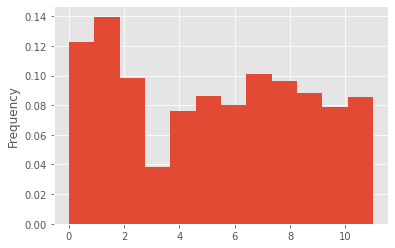

In [33]:
# Make your data visualization here.
# distribution of the keys
songs.get('key').plot(kind = 'hist', x ='key', density=True, bins = 12)

<!-- END QUESTION -->



<a id='section3'></a>
## Section 3: Slow and Steady 🐢🐇

<small>(<a href="#outline">return to the outline</a>)</small>

In music, there are Italian words that describe the tempo, or pace, of a song. In this section, we will analyze the relationship between a song's tempo and its other audio features. But before we do that, we will convert the tempo of each song to its corresponding Italian description. Use the following definitions of Italian tempo markings:

| Italian name | Corresponding tempo range, in beats per minute |
| :--- | :--- |
| Lento | [0, 60) |
| Adagio | [60, 90)
| Adante | [90, 110) |
| Moderato | [110, 120) |
| Allegro | [120, 160) |
| Vivace | [160, 180) |
| Presto | 180 or more |


**Question 3.1.** Add a new column to `songs` called `'tempo_name'` that contains the Italian tempo name for each song.

In [34]:
def return_tempo(tempo):
    if tempo < 60:
        return 'Lento'
    elif tempo < 90:
        return 'Adagio'
    elif tempo < 110:
        return 'Adante'
    elif tempo < 120:
        return 'Moderato'
    elif tempo < 160:
        return 'Allegro'
    elif tempo < 180:
        return 'Vivace'
    else:
        return 'Presto'
        
songs = songs.assign(tempo_name = songs.get('tempo').apply(return_tempo))
songs

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,tempo_name
1053,Jesus Lord pt 2,Kanye West,0.524,0.7260,8.0,1.0,-6.628,0.0941,0.07050,0.019200,0.0877,0.146,107.400,11.512200,Adante
125,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,0.631,0.5180,0.0,1.0,-8.771,0.0303,0.27400,0.000000,0.0880,0.205,93.023,10.217117,Adante
1784,SWEET / I THOUGHT YOU WANTED TO DANCE (feat. B...,"Tyler, The Creator, Brent Faiyaz, Fana Hues",0.468,0.6520,0.0,1.0,-4.912,0.0722,0.33300,0.000318,0.5500,0.390,140.223,9.802317,Allegro
1052,Jesus Lord,Kanye West,0.477,0.7130,1.0,1.0,-6.805,0.1260,0.09840,0.008440,0.0879,0.113,106.137,8.975617,Adante
1719,"Residente: Bzrp Music Sessions, Vol. 49","Bizarrap, Residente",0.586,0.7400,1.0,0.0,-2.997,0.4040,0.55500,0.000000,0.1100,0.697,71.378,8.654817,Adagio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Bezos I,Bo Burnham,0.694,0.9480,2.0,1.0,-5.307,0.0361,0.00936,0.000016,0.1390,0.705,115.044,0.969150,Moderato
189,BLESSED,"Tyler, The Creator",0.336,0.6130,8.0,1.0,-7.869,0.1230,0.38900,0.000100,0.7650,0.741,40.319,0.961117,Lento
575,Donda Chant,Kanye West,0.702,0.0474,3.0,0.0,-15.198,0.5260,0.00516,0.000001,0.1470,0.175,102.983,0.867700,Adante
836,Good News,Pop Smoke,0.573,0.5040,10.0,1.0,-8.116,0.2190,0.23600,0.000000,0.1200,0.526,126.655,0.783217,Allegro


In [35]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** Find the most common combination of `'tempo_name'` and `'key'` among all songs in `songs`. Save both answers in a list named `most_common_combo`. The `'tempo_name'` in the most common combination should come first. For example, your answer might look like `['Vivace', 3.0]`.

Similarly, find the least common combination of `'tempo_name'` and `'key'` among all songs in `songs` and save your answers in a `list` named `least_common_combo`, again with the `'tempo_name'` coming first.

In the case of a tie for most or least common, choose any of the combinations involved in the tie.

In [36]:
prelim = songs.groupby(['key', 'tempo_name']).count().reset_index()
secondary_df = prelim.sort_values(by='track_name', ascending=False).get(['key', 'tempo_name'])
most_common_combo = list([secondary_df.get('tempo_name').iloc[0], float(secondary_df.get('key').iloc[0])])
least_common_combo = list([secondary_df.get('tempo_name').iloc[-1], float(secondary_df.get('key').iloc[-1])])

print('The most common combination is a tempo of ' + most_common_combo[0] + ' and a key of ' + str(most_common_combo[1]) + '.')
print('The least common combination is a tempo of ' + least_common_combo[0] + ' and a key of ' + str(least_common_combo[1]) + '.')

The most common combination is a tempo of Allegro and a key of 1.0.
The least common combination is a tempo of Adante and a key of 2.5.


In [37]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.** Let's identify which songs have the `most_common_combo` of `'tempo_name'` and `'key'`. Starting with `songs`, create a DataFrame of only the songs with this most common `'tempo_name'` and `'key'` combination. Save the result as `common_songs`.

In [38]:
common_songs = songs[(songs.get('tempo_name') == 'Allegro') & (songs.get('key') == 1.0)]
common_songs

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,tempo_name
1411,My Little Love,Adele,0.339,0.492,1.0,1.0,-10.661,0.0559,0.829000,0.003770,0.1470,0.102,151.865,6.485117,Allegro
2090,The Foundations of Decay,My Chemical Romance,0.363,0.670,1.0,0.0,-6.652,0.0552,0.000582,0.548000,0.3170,0.198,150.150,6.012667,Allegro
1838,Self Care,Mac Miller,0.520,0.538,1.0,1.0,-8.109,0.2060,0.367000,0.001870,0.1190,0.177,141.894,5.752217,Allegro
1227,Los Caminos de la Vida - Spotify Singles,Los Dos Carnales,0.827,0.693,1.0,0.0,-4.821,0.0515,0.445000,0.000000,0.0561,0.625,122.465,5.468583,Allegro
1897,Slatty (feat. Yak Gotti & Lil Duke),"Young Stoner Life, Young Thug, Gunna, Lil Duke...",0.814,0.531,1.0,1.0,-7.560,0.0884,0.000544,0.000007,0.1030,0.180,130.020,4.838000,Allegro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,MASSAGING ME,Future,0.916,0.453,1.0,1.0,-4.148,0.1580,0.000189,0.000000,0.1370,0.152,145.007,1.768883,Allegro
1566,POLTERGEIST!,"CORPSE, OmenXIII",0.766,0.658,1.0,1.0,-7.014,0.2600,0.001920,0.000000,0.0919,0.476,133.085,1.684217,Allegro
1578,Pain,PinkPantheress,0.829,0.617,1.0,1.0,-8.497,0.1400,0.227000,0.003060,0.0618,0.810,125.605,1.642400,Allegro
1740,Rocking A Cardigan in Atlanta,lil Shordie Scott,0.803,0.640,1.0,1.0,-4.721,0.1510,0.583000,0.000331,0.4370,0.816,140.073,1.613767,Allegro


In [39]:
grader.check("q3_3")

q3_3 results: All test cases passed!

We want to listen to some of these `common_songs` to see if they have a similar sound. But we have a problem. In order to play a song, we need its `'uri'`, and `common_songs` doesn't have a `'uri'` column. The `charts` DataFrame does have a `'uri'` column so we should be able to bring in that information by merging the two DataFrames. Though `charts` contains `'uri'`, it also has a ton of information that we don't need, since all of the relevant information per song is already in `songs`. As a result, before we merge, we should prepare a smaller, simpler DataFrame from `charts` with only the new information we need.

**Question 3.4.** Create a DataFrame called `to_merge` from `charts`. The DataFrame `to_merge` should have one row for each song (defined as a combination of `'track_name'` and `'artist_names'`) and three columns: `'track_name'`, `'artist_names'`, and `'uri'`. For each song, the associated `'uri'` should be the **first alphabetically**, among all `'uri'`s associated with that song.

In [40]:
# drop dupes based on track name
prelim_df = charts.groupby(['track_name', 'artist_names']).min().reset_index().get(['track_name', 'uri'])
to_merge = songs.merge(prelim_df, on = 'track_name').get(['track_name', 'artist_names', 'uri'])
to_merge = to_merge.groupby(['track_name', 'artist_names']).min().reset_index()

to_merge

,track_name,artist_names,uri
0,'Til You Can't,Cody Johnson,spotify:track:4k3lPl8YTKuY8c1HelVnm3
1,'Till I Collapse,"Eminem, Nate Dogg",spotify:track:4xkOaSrkexMciUUogZKVTS
2,(Don't Fear) The Reaper,Blue Öyster Cult,spotify:track:5QTxFnGygVM4jFQiBovmRo
3,(Everybody's Waitin' For) The Man With The Bag...,Kay Starr,spotify:track:2n1xrggQtAGEV1AgzvooGB
4,(There's No Place Like) Home for the Holidays ...,Perry Como,spotify:track:0hvN2v6fAcB6xWyW7UaooA
...,...,...,...
2549,you broke me first,Tate McRae,spotify:track:45bE4HXI0AwGZXfZtMp8JR
2550,¿Por Qué Me Haces Llorar?,Juan Gabriel,spotify:track:68pE8830rWrd5LSSfKcRqn
2551,¿Quién Te Crees?,"MC Davo, Calibre 50",spotify:track:2LXOSAYiSrTfIf8smheLaz
2552,Éxtasis,"Millonario & W. Corona, Cartel De Santa",spotify:track:3NqbKUOgaU2LgIFRbu4B12


In [41]:
grader.check("q3_4")

q3_4 results: All test cases passed!

Notice that `'track_name'` and `'artist_names'` are columns names in the `common_songs` DataFrame and in the `to_merge` DataFrame. Further, they are the *only* column names that these DataFrames have in common. 

It turns out that when we merge two DataFrames without specifying which columns to merge on, `babypandas` will merge them on the set of shared column names, which means it will match up rows that have the same values in *all* shared columns. 

**Question 3.5.** Merge `common_songs` and `to_merge` on both `'track_name'` and `'artist_names'`. Save the resulting DataFrame as `common_songs_uri`. Think about why we want to merge on both columns in this case (i.e. why we _can't_ merge on just `'track_name'` or just `'artist_names'`).

In [42]:
common_songs_uri = common_songs.merge(to_merge)
common_songs_uri

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,tempo_name,uri
0,My Little Love,Adele,0.339,0.492,1.0,1.0,-10.661,0.0559,0.829000,0.003770,0.1470,0.102,151.865,6.485117,Allegro,spotify:track:2DuPBbS5mIldXnh7Wum8Cy
1,The Foundations of Decay,My Chemical Romance,0.363,0.670,1.0,0.0,-6.652,0.0552,0.000582,0.548000,0.3170,0.198,150.150,6.012667,Allegro,spotify:track:6Pif6RkFoYzLygdqktus4Q
2,Self Care,Mac Miller,0.520,0.538,1.0,1.0,-8.109,0.2060,0.367000,0.001870,0.1190,0.177,141.894,5.752217,Allegro,spotify:track:5bJ1DrEM4hNCafcDd1oxHx
3,Los Caminos de la Vida - Spotify Singles,Los Dos Carnales,0.827,0.693,1.0,0.0,-4.821,0.0515,0.445000,0.000000,0.0561,0.625,122.465,5.468583,Allegro,spotify:track:0LPcBW66vudTxR0HcauKNy
4,Slatty (feat. Yak Gotti & Lil Duke),"Young Stoner Life, Young Thug, Gunna, Lil Duke...",0.814,0.531,1.0,1.0,-7.560,0.0884,0.000544,0.000007,0.1030,0.180,130.020,4.838000,Allegro,spotify:track:0ky8syPEVEfD7qCxMTW49X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,MASSAGING ME,Future,0.916,0.453,1.0,1.0,-4.148,0.1580,0.000189,0.000000,0.1370,0.152,145.007,1.768883,Allegro,spotify:track:2tzgSUZOUKopYbRqQOVT8X
122,POLTERGEIST!,"CORPSE, OmenXIII",0.766,0.658,1.0,1.0,-7.014,0.2600,0.001920,0.000000,0.0919,0.476,133.085,1.684217,Allegro,spotify:track:041sluNZwBxTCOuu766eNi
123,Pain,PinkPantheress,0.829,0.617,1.0,1.0,-8.497,0.1400,0.227000,0.003060,0.0618,0.810,125.605,1.642400,Allegro,spotify:track:4S4QJfBGGrC8jRIjJHf1Ka
124,Rocking A Cardigan in Atlanta,lil Shordie Scott,0.803,0.640,1.0,1.0,-4.721,0.1510,0.583000,0.000331,0.4370,0.816,140.073,1.613767,Allegro,spotify:track:0N0h5lXc4HOiLgGb9EZi8m


In [43]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6.** It would be great if we could listen to the songs in `common_songs_uri` to see if they sound alike, but there are too many songs to listen to them all. In an array called `certain_uris`, store the following `'uri'`s:
- the first alphabetical `'uri'` in `common_songs_uri`,
- then every 40th song thereafter, when the songs are ordered alphabetically by `'uri'`. 

Then, play all the songs whose `'uri'`s are stored in `certain_uris`. As in Question 1.3, you should only call the function `play_spotify` one time! 

In [44]:
# sort uris in alphabetical
certain_uris = np.array(common_songs_uri.get('uri').sort_values())
certain_uris

certain_uris = certain_uris.take(np.arange(0, certain_uris.size, 40))
certain_uris

# Play the songs here.
for uri in certain_uris:
    play_spotify(uri)

In [45]:
grader.check("q3_6")

q3_6 results: All test cases passed!

**Question 3.7.** Now, let's categorize songs by their Italian tempo names. Specifically, find the mean of each numerical variable for each `'tempo_name'`. Store these means in a DataFrame indexed by `'tempo_name'` and sorted from slowest to fastest tempos. Save your DataFrame to the variable `song_means`. 

In [46]:
# mean of each numerical variable for each tempo name

# one column of mean of each tempo
# one column of all tempos
song_means = songs.groupby('tempo_name').mean().sort_values(by='tempo', ascending=True)
song_means

,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
tempo_name,,,,,,,,,,,,
Lento,0.382000,0.363000,8.333333,0.666667,-13.754667,0.065867,0.529333,0.012967,0.342033,0.684333,45.251667,2.423483
Adagio,0.621284,0.559786,5.140704,0.625628,-7.147053,0.144588,0.318340,0.012825,0.182341,0.478925,80.822819,3.381803
Adante,0.704633,0.634094,5.306588,0.576014,-6.452064,0.102016,0.263806,0.013010,0.171431,0.544834,98.818757,3.408258
Moderato,0.698731,0.616624,5.129151,0.619926,-6.774517,0.081015,0.276549,0.014388,0.187421,0.544509,115.489395,3.353159
Allegro,0.681836,0.613450,5.152151,0.631689,-6.842650,0.112475,0.249058,0.010604,0.180571,0.506538,136.898663,3.319493
Vivace,0.622379,0.637733,5.192308,0.615385,-6.232313,0.166024,0.241861,0.012375,0.185906,0.548454,170.314977,3.362829
Presto,0.513000,0.600714,5.116883,0.688312,-6.845909,0.139118,0.306433,0.009172,0.149688,0.526116,187.764870,3.587768


In [47]:
grader.check("q3_7")

q3_7 results: All test cases passed!

**Question 3.8.** One `'tempo_name'` category has far fewer songs than the others. Since there are too few songs of this `'tempo_name'` for us to draw any meaningful conclusions from, let's create a version of `song_means` without this row. Save the resulting DataFrame in `song_means_modified`.

In [48]:
song_means_modified = song_means.reset_index()#
song_means_modified = song_means_modified[song_means_modified.get('tempo_name') != 'Lento'].set_index('tempo_name')
song_means_modified

,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
tempo_name,,,,,,,,,,,,
Adagio,0.621284,0.559786,5.140704,0.625628,-7.147053,0.144588,0.318340,0.012825,0.182341,0.478925,80.822819,3.381803
Adante,0.704633,0.634094,5.306588,0.576014,-6.452064,0.102016,0.263806,0.013010,0.171431,0.544834,98.818757,3.408258
Moderato,0.698731,0.616624,5.129151,0.619926,-6.774517,0.081015,0.276549,0.014388,0.187421,0.544509,115.489395,3.353159
Allegro,0.681836,0.613450,5.152151,0.631689,-6.842650,0.112475,0.249058,0.010604,0.180571,0.506538,136.898663,3.319493
Vivace,0.622379,0.637733,5.192308,0.615385,-6.232313,0.166024,0.241861,0.012375,0.185906,0.548454,170.314977,3.362829
Presto,0.513000,0.600714,5.116883,0.688312,-6.845909,0.139118,0.306433,0.009172,0.149688,0.526116,187.764870,3.587768


In [49]:
grader.check("q3_8")

q3_8 results: All test cases passed!

**Question 3.9.** Using `song_means_modified`, create a line plot that portrays how `'danceability'`, `'energy'`, `'acousticness'`, and `'valence'` change according to `'tempo_name'`. Make sure your plot arranges songs from slowest to fastest tempos.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_9
manual: true
points: 1
-->

<AxesSubplot:xlabel='tempo_name'>

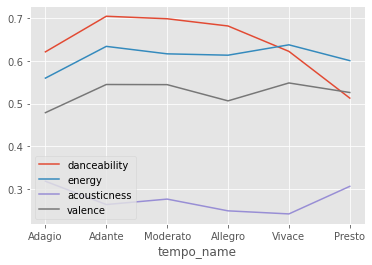

In [50]:
# Make your line plot here.
song_means_modified.get(['danceability', 'energy', 'acousticness', 'valence']).plot(kind='line')

<!-- END QUESTION -->



**Question 3.10.** You may have noticed from the plot in the previous question that `'energy'` and `'valence'` seem to move together. This means these variables are _associated_.

In the cell below, answer the following questions.
- Can we use the `'energy'` of a song to predict its `'valence'`?
- If so, does this mean that high `'energy'` causes high `'valence'`? Why or why not?

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_10
manual: true
points: 1
-->

There is an association between energy and valence because the positive and negative trends of the lines are very similar, so the visual impression is that they are associated with one another; since the lines move together, we can use energy to predict valence. However, we do not have enough information to know whether higher energy causes higher valence. There is association, but not confounding evidence towards causation.

<!-- END QUESTION -->



<a id='section4'></a>

## Section 4: Crazy in Love 💕

<small>(<a href="#outline">return to the outline</a>)</small>

Now that we've developed an understanding of how a song's `'tempo_name'` relates to its audio features, let's turn our attention to the relationship between a song's `'track_name'` and its audio features. We'll start by looking at songs that contain `'love'` in the `'track_name'` and learning about what makes them special relative to other songs.

**Question 4.1.** Create a DataFrame called `love_and_not` that has all the same rows and columns as `songs`, plus one extra column, called `'has_love'`. This column should contain either the **string** `'True'` or `'False'`, corresponding to whether or not  the string `'love'` is part of the song's `'track_name'`. 

We consider `'love'` to be a part of a song's `'track_name'` even in the following scenarios:
- `'love'` is part of another word, e.g. `'track_name'` contains `'lovely'`.
- The capitalization is different, e.g. the `'track_name'` contains `'LoVE'`.

_Note_: It may seem strange that we're asking you to use the strings `'True'` and `'False'` rather than the Boolean values `True` and `False` directly; this will make more sense in the coming questions.

In [51]:
def love_or_not(track_name):
    track_name = track_name.lower()
    
    if 'love' in track_name:
        track_name = 'True'
        return track_name
    else:
        track_name = 'False'
        return track_name
    
love_and_not = songs.assign(has_love = songs.get('track_name').apply(love_or_not))
love_and_not 

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,tempo_name,has_love
1053,Jesus Lord pt 2,Kanye West,0.524,0.7260,8.0,1.0,-6.628,0.0941,0.07050,0.019200,0.0877,0.146,107.400,11.512200,Adante,False
125,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,0.631,0.5180,0.0,1.0,-8.771,0.0303,0.27400,0.000000,0.0880,0.205,93.023,10.217117,Adante,False
1784,SWEET / I THOUGHT YOU WANTED TO DANCE (feat. B...,"Tyler, The Creator, Brent Faiyaz, Fana Hues",0.468,0.6520,0.0,1.0,-4.912,0.0722,0.33300,0.000318,0.5500,0.390,140.223,9.802317,Allegro,False
1052,Jesus Lord,Kanye West,0.477,0.7130,1.0,1.0,-6.805,0.1260,0.09840,0.008440,0.0879,0.113,106.137,8.975617,Adante,False
1719,"Residente: Bzrp Music Sessions, Vol. 49","Bizarrap, Residente",0.586,0.7400,1.0,0.0,-2.997,0.4040,0.55500,0.000000,0.1100,0.697,71.378,8.654817,Adagio,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Bezos I,Bo Burnham,0.694,0.9480,2.0,1.0,-5.307,0.0361,0.00936,0.000016,0.1390,0.705,115.044,0.969150,Moderato,False
189,BLESSED,"Tyler, The Creator",0.336,0.6130,8.0,1.0,-7.869,0.1230,0.38900,0.000100,0.7650,0.741,40.319,0.961117,Lento,False
575,Donda Chant,Kanye West,0.702,0.0474,3.0,0.0,-15.198,0.5260,0.00516,0.000001,0.1470,0.175,102.983,0.867700,Adante,False
836,Good News,Pop Smoke,0.573,0.5040,10.0,1.0,-8.116,0.2190,0.23600,0.000000,0.1200,0.526,126.655,0.783217,Allegro,False


In [52]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** Let's compare the `'loudness'` of songs whose `'track_name'`s include `'love'` with the songs whose `'track_name'`s don't include `'love'`. Calculate the mean `'loudness'` of all songs containing the word `'love'` and store that in `average_love_song_loudness`. Similarly, calculate the mean `'loudness'` of all songs not containing the word `'love'` and store that in `average_non_love_song_loudness`.

_Note_: `'loudness'` is represented as a negative number; smaller numbers correspond to quieter songs.

In [53]:
# get all track names where has_love == 'True'
# get loudness for those songs
# create sep df of all songs containing love
# create sep df of all songs not containing love
# compute mean of those dfs

love_df = love_and_not[love_and_not.get('has_love') == 'True']
not_love_df = love_and_not[love_and_not.get('has_love') == 'False']

average_love_song_loudness = love_df.get('loudness').mean()
average_non_love_song_loudness = not_love_df.get('loudness').mean()

print('The average loudness of songs whose titles include "love" is ' + str(round(average_love_song_loudness, 2)) + '.')
print('The average loudness of songs whose titles don\'t include "love" is ' + str(round(average_non_love_song_loudness, 2)) + '.')

The average loudness of songs whose titles include "love" is -6.49.
The average loudness of songs whose titles don't include "love" is -6.75.


In [54]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** The audio features listed below are all measured on a 0 to 1 scale.
- `'danceability'`
- `'energy'`
- `'speechiness'`
- `'acousticness'`
- `'instrumentalness'`
- `'liveness'`
- `'valence'`

Let's try and understand how these features differ between songs with and without `'love'` in the `'track_name'`.

Create a DataFrame called `love_means`, indexed by `'has_love'`, that contains the mean value of each of the 7 features above, separately for songs with `'love'` in the `'track_name'` and songs without `'love'` in the `'track_name'`. `love_means` should have 2 rows – one where `'has_love'` is `'False'` and one where `'has_love'` is `'True'` – and 7 columns. 

For instance, `love_means.get('energy').loc['False']` should be the mean `'energy'` among songs that don't have `'love'` in the `'track_name'`.

In [55]:
# separate by love and not_love
# index by 'has_love'
# mean of each of the seven features
love_means = love_and_not.groupby('has_love').mean().get(['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence'])
love_means

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
has_love,,,,,,,
False,0.669461,0.612243,0.119282,0.266987,0.012123,0.179766,0.522467
True,0.616239,0.603620,0.070163,0.286026,0.009477,0.161449,0.441172


In [56]:
grader.check("q4_3")

q4_3 results: All test cases passed!

`love_means` has all the information we need. However, for the purposes of creating visualizations, we need to change its format so that the columns become the rows and the rows become the columns. This is called *transposing* the DataFrame, and it's very easy to accomplish in `babypandas` by typing `.T` after the name of a DataFrame. Run the next cell to see what happens when we transpose `love_means`.

In [57]:
transposed_love = love_means.T 
transposed_love

has_love,False,True
danceability,0.669461,0.616239
energy,0.612243,0.603620
speechiness,0.119282,0.070163
acousticness,0.266987,0.286026
instrumentalness,0.012123,0.009477
liveness,0.179766,0.161449
valence,0.522467,0.441172


`transposed_love` has the same information that `love_means` does, it's just presented differently.

**Question 4.4.** Add a column called `'AbsDiff'` to `transposed_love` containing the absolute difference between the `'False'` and `'True'` columns.

In [58]:
transposed_love = transposed_love.assign(AbsDiff = np.abs(transposed_love.get('False') - transposed_love.get('True')))
transposed_love

has_love,False,True,AbsDiff
danceability,0.669461,0.616239,0.053222
energy,0.612243,0.603620,0.008623
speechiness,0.119282,0.070163,0.049119
acousticness,0.266987,0.286026,0.019039
instrumentalness,0.012123,0.009477,0.002645
liveness,0.179766,0.161449,0.018317
valence,0.522467,0.441172,0.081295


In [59]:
grader.check("q4_4")

q4_4 results: All test cases passed!

**Question 4.5.** Using `transposed_love`, create a horizontal bar chart comparing the mean values of each of the 7 audio features for songs with and without `'love'` in the `'track_name'`. Your bar chart should have 14 bars total, 7 for songs with `'love'` and 7 for songs without `'love'`.

Use the `'AbsDiff'` column to arrange the bars in the chart such that the audio feature which is most affected by the presence of the word `'love'` appears at the top and the one that's least affected is at the bottom.

Title your chart `'Comparison of Songs Containing Love in the Title vs. Not'`.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_5
manual: true
-->

<AxesSubplot:ylabel='index'>

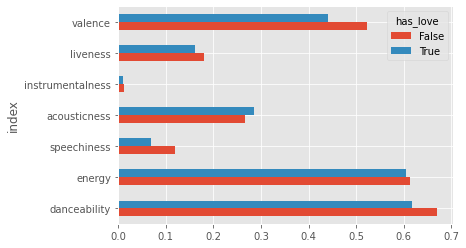

In [60]:
# Make your horizontal bar chart here.
transposed_love.reset_index().drop(columns=['AbsDiff']).plot(kind='barh', x = 'index')

<!-- END QUESTION -->



**Question 4.6. ⭐️⭐️** Let's generalize this analysis to any word, not just `'love'`. Define a function called `word_analysis` that takes two arguments:
- `word`, which can be any word that appears in at least one `'track_name'`. The input word can be capitalized any way; the function should not be case sensitive.
- `draw_plot`, which should be a Boolean value corresponding to whether or not a bar chart should be drawn. By setting `draw_plot=False` in the parameter list in the function definition, we make `draw_plot` an optional argument whose default value is `False`. If not `draw_plot` is not specified by the caller of the function, the function will not draw the plot.

If `draw_plot` is `True`, this function should produce a horizontal bar chart similar to the one you produced in the last question, except it will group songs based on whether or not their `'track_name'` contains the input word (as opposed to `'love'`). The bars should be ordered in the same way as described in the previous question, and the title of the plot should be of the same format, with just the first letter of the input word capitalized.

In all cases, `word_analysis` should return a DataFrame with 7 rows, in any order, representing the 7 audio features, and 3 columns:
- The `'False'` column should contain the mean values of all audio features, among songs that do not contain the given word in the `'track_name'`.
- The `'True'` column should contain the mean values of all audio features, among songs that do contain the given word in the `'track_name'`.
- `'AbsDiff'` should contain the absolute difference between the `'False'` and `'True'` columns.

For example, `word_analysis('CaliforNiA', True)` should return the following DataFrame:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>has_word</th>
      <th>False</th>
      <th>True</th>
      <th>AbsDiff</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>acousticness</th>
      <td>0.267513</td>
      <td>0.269535</td>
      <td>0.002022</td>
    </tr>
    <tr>
      <th>valence</th>
      <td>0.520189</td>
      <td>0.532000</td>
      <td>0.011811</td>
    </tr>
    <tr>
      <th>instrumentalness</th>
      <td>0.012068</td>
      <td>0.000125</td>
      <td>0.011943</td>
    </tr>
    <tr>
      <th>energy</th>
      <td>0.612034</td>
      <td>0.592500</td>
      <td>0.019534</td>
    </tr>
    <tr>
      <th>liveness</th>
      <td>0.179226</td>
      <td>0.199125</td>
      <td>0.019899</td>
    </tr>
    <tr>
      <th>danceability</th>
      <td>0.668027</td>
      <td>0.638750</td>
      <td>0.029277</td>
    </tr>
    <tr>
      <th>speechiness</th>
      <td>0.118015</td>
      <td>0.055175</td>
      <td>0.062840</td>
    </tr>
  </tbody>
</table>

and display the following plot:

<img src='data/cali-example.png'>


*Note*: Your function does not need to work on input words not in the title of some song in `songs`. For example, it's okay if `word_analysis('znvlox')` errors.

*Hint*: To make sure that the first letter of the input word is capitalized when setting the title of your plot, use one of the string methods [detailed here](https://docs.python.org/3/library/stdtypes.html#string-methods).

(<AxesSubplot:title={'center':'Comparison of Songs Containing Jesus in the Title vs. Not'}>,
 has_word             False      True
 danceability      0.668148  0.526333
 energy            0.611990  0.623333
 speechiness       0.117959  0.082333
 acousticness      0.267581  0.212633
 instrumentalness  0.012052  0.009213
 liveness          0.179345  0.104200
 valence           0.520635  0.156333)

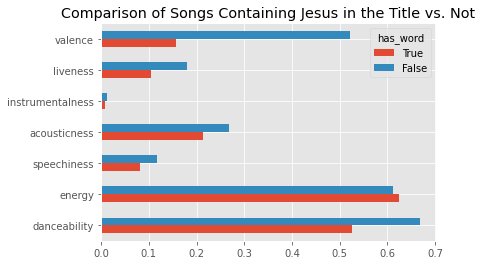

In [61]:
def str_bool(word):
    return str(word)

def word_analysis(word, draw_plot=False):
    # make it lowercase
    word = word.lower()
    
    prelim_df = songs.assign(has_word = songs.get('track_name').str.lower().str.contains(word, case=False).apply(str_bool))
    prelim_df2 = prelim_df.assign(has_word = prelim_df.get('has_word'))#.apply(str))

    # groupby mean, get columns, transpose
    filtered_df = prelim_df.groupby('has_word').mean().get(['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']).T
    final_df = filtered_df

    if draw_plot:
        return final_df.assign(AbsDiff = abs(final_df.get('False') - final_df.get('True'))).plot(kind='barh', y = ['True', 'False'], title= 'Comparison of Songs Containing ' + word.capitalize() + ' in the Title vs. Not'), final_df  
    else:
        return final_df.assign(AbsDiff = abs(final_df.get('False') - final_df.get('True')))
        
# Test out your function. Feel free to change these inputs.
word_analysis('Jesus', draw_plot = True) 

In [62]:
grader.check("q4_6")

q4_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

Make sure to run the cell below before submitting. **Do not edit or delete it**.

<!--
BEGIN QUESTION
name: q4_6_manual
points: 1
manual: true
-->

(<AxesSubplot:title={'center':'Comparison of Songs Containing Hurt in the Title vs. Not'}>,
 has_word             False    True
 danceability      0.668022  0.5660
 energy            0.611896  0.8850
 speechiness       0.117931  0.0818
 acousticness      0.267583  0.0958
 instrumentalness  0.012054  0.0001
 liveness          0.179196  0.3340
 valence           0.520292  0.3040)

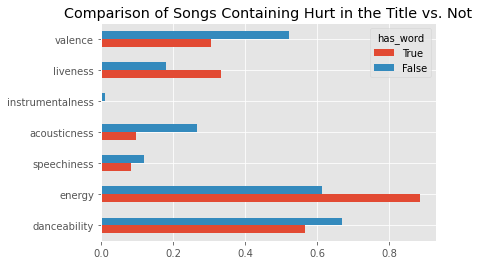

In [63]:
word_analysis('huRt', True)

<!-- END QUESTION -->



Let's define the *polarity* of a word as the total absolute difference between the `'True'` and `'False'` columns, across all 7 audio features. If a word has high polarity, it means songs containing that word in the `'track_name'` are very musically different from songs without that word in the `'track_name'`. If a word has low polarity, it means songs containing that word and not containing that word in the `'track_name'` are musically similar.

**Question 4.7.** Define a function `polarity` that takes one input, a string representing a word that that appears in at least one `'track_name'` in `songs`, and returns the polarity of that word.

In [64]:
def polarity(word):
    # polarity is abs diff of all 7  columns
    prelim_df = songs.assign(has_word = songs.get('track_name').str.lower().str.contains(word).apply(str_bool))
    filtered_df = prelim_df.groupby('has_word').mean().get(['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence']).T
    final_df = filtered_df
    final_df = final_df.assign(AbsDiff = abs(final_df.get('False') - final_df.get('True'))).sum().get('AbsDiff')
    return final_df
    

# Test out your function. Feel free to change the input.
polarity('hate')

0.5100413712521734

In [65]:
grader.check("q4_7")

q4_7 results: All test cases passed!

On its own, the polarity of a single word doesn't tell us much. Instead, we need to look at the polarities of several words and compare them, to see which words are more polarizing than others.

Run the cell below to load in an array of words.

In [66]:
polarity_words = np.array(['love', 'hate', 'miracle', 'dead', 'feel', 'hold', 'about', 'and', 'christmas',
                           'you', 'wonder', 'hello', 'work', 'hurt', 'where', 'quiero', 'shake', 'was'])

**Question 4.8.** Create an array called `polarity_words_ranked` containing the same words as `polarity_words` but ordered in descending order of polarity.

In [67]:
polarity_words_ranked = np.array([])
for word in polarity_words:
    polarity_words_ranked = np.append(polarity_words_ranked, polarity(word))
    
temp_df = bpd.DataFrame().assign(words = polarity_words, polarity=polarity_words_ranked).sort_values(by='polarity', ascending=False)
polarity_words_ranked = temp_df.get('words').to_numpy()
polarity_words_ranked

array(['quiero', 'shake', 'miracle', 'hurt', 'wonder', 'work',
       'christmas', 'hate', 'dead', 'about', 'where', 'hold', 'was',
       'feel', 'hello', 'love', 'you', 'and'], dtype=object)

In [68]:
grader.check("q4_8")

q4_8 results: All test cases passed!

You may notice that very common words, like `'and'` and `'was'`, aren't very polarizing. See if you can come up with other words that are either very polarizing or very "neutral," relative to the words in the array above.

Before we conclude this section, let's stop and notice something we did inadvertently. It turns out we can use some of the analysis we've done here to see how individual songs compare to the rest of the songs in the dataset. For example, let's see how `'The Weeknd'`'s song `'A Tale By Quincy'` stacks up against the rest of the songs in the weekly top 200. Our `word_analysis` function should work even if we pass in phrases, so we can use it to compare songs with `'A Tale By Quincy'` in the title to songs without that string in the title. As you might expect, the only song in the dataset with `'A Tale By Quincy'` as part of the title is `'A Tale By Quincy'` itself. 

(<AxesSubplot:title={'center':'Comparison of Songs Containing A tale by quincy in the Title vs. Not'}>,
 has_word             False     True
 danceability      0.668068  0.44700
 energy            0.612042  0.51300
 speechiness       0.117913  0.12700
 acousticness      0.267355  0.67900
 instrumentalness  0.012054  0.00003
 liveness          0.179289  0.09600
 valence           0.520187  0.57200)

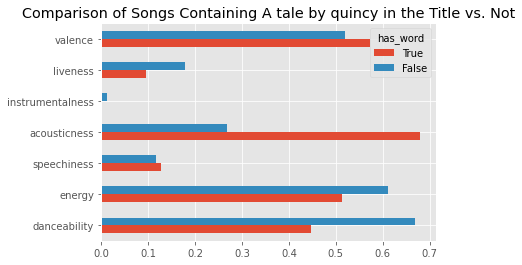

In [69]:
word_analysis('A Tale By Quincy', True)

The resulting analysis shows, for example, that `'A Tale By Quincy'` is much more acoustic than a typical song on the weekly top 200. Run the cell below to listen for yourself and see if you agree.

In [70]:
play_spotify('spotify:track:759ndr57jb0URg4j9YSWml')

Of course, we wouldn't be able to isolate specific songs by name like this if multiple artists have a song by the same name, or if the full song title is included in other song titles. But for most songs, this does work! Try it out on one of your favorite songs below to see what makes that song so special.

(<AxesSubplot:title={'center':'Comparison of Songs Containing Heat waves in the Title vs. Not'}>,
 has_word             False      True
 danceability      0.667945  0.761000
 energy            0.612037  0.525000
 speechiness       0.117926  0.094400
 acousticness      0.267448  0.440000
 instrumentalness  0.012054  0.000007
 liveness          0.179291  0.092100
 valence           0.520203  0.531000)

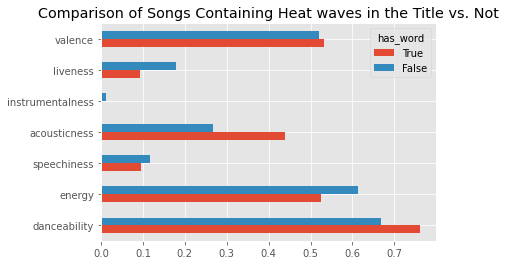

In [71]:
word_analysis('Heat Waves', True)

<a id='section5'></a>
## Section 5: The Test of Time ⌛️

<small>(<a href="#outline">return to the outline</a>)</small>

In the last three sections, we've worked with the audio features of songs. We haven't yet used any of the date information we have available – that is, we haven't looked at the `'week'` or `'release_date'` columns in `charts`.  In this section, we'll switch our attention to these columns, to study how the "age" of top songs in `charts` has changed over time.

Run the cell below to load in the `charts` DataFrame again. 

In [72]:
charts = bpd.read_csv('data/weekly_charts.csv')
charts

,week,rank,track_name,uri,release_date,streams,artist_names,artist_individual,artist_id,artist_genre,...,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country
0,2021-02-04,1,drivers license,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,2021-01-08,2054319,Olivia Rodrigo,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,...,1,-8.761,0.0601,0.7210,0.000013,0.1050,0.132,143.874,242014,Canada
1,2021-02-04,2,Good Days,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,2020-12-25,916516,SZA,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,r&b,...,0,-8.370,0.0583,0.4990,0.000008,0.6880,0.412,121.002,279204,Canada
2,2021-02-04,3,Save Your Tears,spotify:track:5QO79kh1waicV47BqGRL3g,2020-03-20,866067,The Weeknd,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,...,1,-5.487,0.0309,0.0212,0.000012,0.5430,0.644,118.051,215627,Canada
3,2021-02-04,4,Mood (feat. iann dior),spotify:track:3tjFYV6RSFtuktYl3ZtYcq,2020-07-24,824789,"24kGoldn, iann dior",24kGoldn,spotify:artist:6fWVd57NKTalqvmjRd2t8Z,cali rap,...,0,-3.558,0.0369,0.2210,0.000000,0.2720,0.756,90.989,140526,Canada
4,2021-02-04,4,Mood (feat. iann dior),spotify:track:3tjFYV6RSFtuktYl3ZtYcq,2020-07-24,824789,"24kGoldn, iann dior",iann dior,spotify:artist:6ASri4ePR7RlsvIQgWPJpS,melodic rap,...,0,-3.558,0.0369,0.2210,0.000000,0.2720,0.756,90.989,140526,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70178,2022-07-14,196,Get Into It (Yuh),spotify:track:0W6I02J9xcqK8MtSeosEXb,2021-06-25,1592100,Doja Cat,Doja Cat,spotify:artist:5cj0lLjcoR7YOSnhnX0Po5,dance pop,...,0,-6.029,0.1620,0.3150,0.000034,0.0894,0.793,91.942,138293,United States
70179,2022-07-14,197,Fancy Like,spotify:track:58UKC45GPNTflCN6nwCUeF,2022-01-21,1590126,Walker Hayes,Walker Hayes,spotify:artist:7sKxqpSqbIzphAKAhrqvlf,modern country rock,...,1,-6.459,0.0600,0.1110,0.000000,0.3150,0.855,79.994,161853,United States
70180,2022-07-14,198,Stick Season,spotify:track:0GNVXNz7Jkicfk2mp5OyG5,2022-07-08,1583302,Noah Kahan,Noah Kahan,spotify:artist:2RQXRUsr4IW1f3mKyKsy4B,pop,...,1,-6.935,0.0651,0.7990,0.000000,0.0966,0.801,117.896,182347,United States
70181,2022-07-14,199,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,2018-03-30,1583235,The Weeknd,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,...,1,-4.954,0.0356,0.1700,0.000000,0.3070,0.175,134.170,228373,United States


From the DataFrame preview, it looks like `'week'` and `'release_date'` are given as strings in `'YYYY-MM-DD'` format. Unfortunately, some tracks have an incomplete `'release_date'`, in the form `'YYYY'` or `'YYYY-MM'`. 

**Question 5.1.** What proportion of the rows of `charts` have a `'release_date'` of the form `'YYYY'`, with just a year? Save your result as `year_only`. Similarly, what proportion of the rows of `charts` have a `'release_date'` of the form `'YYYY-MM'`, with just a year and month? Save your result as `year_month_only`.

In [73]:
total_length = charts.shape[0]

year_only = charts[charts.get('release_date').apply(len) == 4].shape[0] / total_length
year_month_only = charts[charts.get('release_date').apply(len) == 7].shape[0] / total_length

print("The proportion of songs in `charts` that have a release_date in the form 'YYYY' is " + str(round(year_only, 7)) + ".")
print("The proportion of songs in `charts` that have a release_date in the form 'YYYY-MM' is " + str(round(year_month_only, 7)) + ".")

The proportion of songs in `charts` that have a release_date in the form 'YYYY' is 0.0143909.
The proportion of songs in `charts` that have a release_date in the form 'YYYY-MM' is 0.0004844.


In [74]:
grader.check("q5_1")

q5_1 results: All test cases passed!

For consistency, let's input the missing months and days where necessary, so that all dates in `charts` will be in the same format. We don't actually know when these songs were released, so we'll just choose to handle the missing months and days by replacing them with `'01'`. That is, if a song has just a year listed for its `'release_date'`, we'll assume it was released on January 1st of that year. Similarly, if a song has just a year and month listed, we'll assume it was released on the first of that month.

**Question 5.2.** Replace the missing months and days in the `'release_date'` column of `charts` with `'01'` as described.

In [75]:
# 'YYYY-01-01'
def alter_date(date):
    if len(date) == 4:
        return date + '-01-01'
    elif len(date) == 7:
        return date + '-01'
    else:
        return date
    
charts = charts.assign(release_date = charts.get('release_date').apply(alter_date))
charts    

,week,rank,track_name,uri,release_date,streams,artist_names,artist_individual,artist_id,artist_genre,...,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country
0,2021-02-04,1,drivers license,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,2021-01-08,2054319,Olivia Rodrigo,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,...,1,-8.761,0.0601,0.7210,0.000013,0.1050,0.132,143.874,242014,Canada
1,2021-02-04,2,Good Days,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,2020-12-25,916516,SZA,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,r&b,...,0,-8.370,0.0583,0.4990,0.000008,0.6880,0.412,121.002,279204,Canada
2,2021-02-04,3,Save Your Tears,spotify:track:5QO79kh1waicV47BqGRL3g,2020-03-20,866067,The Weeknd,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,...,1,-5.487,0.0309,0.0212,0.000012,0.5430,0.644,118.051,215627,Canada
3,2021-02-04,4,Mood (feat. iann dior),spotify:track:3tjFYV6RSFtuktYl3ZtYcq,2020-07-24,824789,"24kGoldn, iann dior",24kGoldn,spotify:artist:6fWVd57NKTalqvmjRd2t8Z,cali rap,...,0,-3.558,0.0369,0.2210,0.000000,0.2720,0.756,90.989,140526,Canada
4,2021-02-04,4,Mood (feat. iann dior),spotify:track:3tjFYV6RSFtuktYl3ZtYcq,2020-07-24,824789,"24kGoldn, iann dior",iann dior,spotify:artist:6ASri4ePR7RlsvIQgWPJpS,melodic rap,...,0,-3.558,0.0369,0.2210,0.000000,0.2720,0.756,90.989,140526,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70178,2022-07-14,196,Get Into It (Yuh),spotify:track:0W6I02J9xcqK8MtSeosEXb,2021-06-25,1592100,Doja Cat,Doja Cat,spotify:artist:5cj0lLjcoR7YOSnhnX0Po5,dance pop,...,0,-6.029,0.1620,0.3150,0.000034,0.0894,0.793,91.942,138293,United States
70179,2022-07-14,197,Fancy Like,spotify:track:58UKC45GPNTflCN6nwCUeF,2022-01-21,1590126,Walker Hayes,Walker Hayes,spotify:artist:7sKxqpSqbIzphAKAhrqvlf,modern country rock,...,1,-6.459,0.0600,0.1110,0.000000,0.3150,0.855,79.994,161853,United States
70180,2022-07-14,198,Stick Season,spotify:track:0GNVXNz7Jkicfk2mp5OyG5,2022-07-08,1583302,Noah Kahan,Noah Kahan,spotify:artist:2RQXRUsr4IW1f3mKyKsy4B,pop,...,1,-6.935,0.0651,0.7990,0.000000,0.0966,0.801,117.896,182347,United States
70181,2022-07-14,199,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,2018-03-30,1583235,The Weeknd,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,...,1,-4.954,0.0356,0.1700,0.000000,0.3070,0.175,134.170,228373,United States


In [76]:
grader.check("q5_2")

q5_2 results: All test cases passed!

**Question 5.3.** Find the song in `charts` with the earliest `'release_date'`. Save the name of this song to `oldest_song` and save the `'artist_names'` associated with this song to `oldest_song_artists`.

This song has stood the test of time – you'll see why!

In [77]:
# earliest release date 
# sort by year -> month -> day

oldest_song = charts.sort_values(by = 'release_date', ascending=True).get('track_name').iloc[0]
oldest_song_artists = charts.sort_values(by = 'release_date', ascending=True).get('artist_names').iloc[0]
print('The oldest song in `charts` is ' + oldest_song + ' by ' + oldest_song_artists)

The oldest song in `charts` is White Christmas by Bing Crosby, Ken Darby Singers, John Scott Trotter & His Orchestra


In [78]:
grader.check("q5_3")

q5_3 results: All test cases passed!

Let’s try to calculate the time between when this song was first released and when this song was in the weekly top 200 most recently. To tackle this problem and others like it, we'll write a general function to calculate the time between any two dates.

**Question 5.4. ⭐️⭐️** Complete the implementation of the function `weeks_between`, which takes in two dates as lists in the form `[year, month, day]` and returns the number of **full weeks** between the two dates. You may assume the second date comes after the first.

Here, we'll define a full week as 7 days. For example, if there are 200 days between two dates, we'd say there are 28 *full* weeks between the two dates, since $\frac{200}{7} = 28.571$. 

Example behavior is given below.

```py
# There are 11 days between March 14th, 2022 and March 25th, 2022.
# This corresponds to 1 full week.
>>> weeks_between([2022, 3, 14], [2022, 3, 25])
1

# There are 805 days between November 26th, 1998 and February 9th, 2001, not counting leap year days.
# This corresponds to 115 full weeks.
>>> weeks_between([1998, 11, 26], [2001, 2, 9])
115
```

To help you, we've provided a function called `days_between` and a [video walkthrough of how it works](https://www.youtube.com/watch?v=6HOAk0GAqKU). Make sure you understand what this function does and how it works, because you'll want to make use of it inside `weeks_between`.

_Note_: **Don't factor in leap years** for the purposes of this question. We'll assume that every year has 365 days.

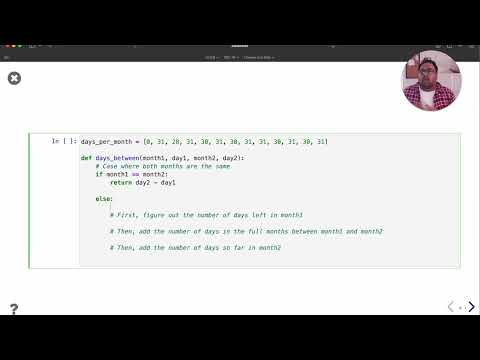

In [79]:
# Run this cell to view the walkthrough video.
YouTubeVideo('6HOAk0GAqKU')

In [80]:
# This function is provided. Watch the walkthrough video to understand what it does and how it works.
def days_between(month1, day1, month2, day2):
    
    # days_per_month[1] is the number of days in January, days_per_month[8] is the number of days in August, etc.
    days_per_month = np.array([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
    
    # Case where both months are the same.
    if month1 == month2:
        return day2 - day1
    
    else:
        total_days = 0
        
        # First, figure out the number of days left in month1.
        total_days = total_days + days_per_month[month1] - day1
        
        # Then, add the number of days in the full months between month1 and month2.
        for full_month in np.arange(month1 + 1, month2):
            total_days = total_days + days_per_month[full_month]
            
        # Then, add the number of days so far in month2.
        total_days = total_days + day2
        
        return total_days

We've already provided an outline for what you need to do in `weeks_between`; your job is to fill in the missing pieces.

<!--
BEGIN QUESTION
name: q5_4
points: 2
-->

In [81]:
def weeks_between(date1, date2):
    # Store the year, day, and month for each date separately as ints.
    year1 = date1[0]
    month1 = date1[1]
    day1 = date1[2]
    year2 = date2[0]
    month2 = date2[1]
    day2 = date2[2]
    
    # Main idea: Find the total number of days between the two dates, then divide that by 7 and round down.
    total_days = 0
    
    # Case 1: The dates are in the same year. 
    if year1 == year2:
        # Calculate the number of days between them.
        total_days = days_between(month1, day1, month2, day2)
        
    # Case 2: The dates are in different years.
    else:
        # Add 365 for each FULL year between the dates.
        for year in np.arange(int(year1)+1, year2):
            total_days = total_days + 365 
        # Add the number of days between date1 and the end of year1.
        total_days = total_days + days_between(month1, day1, 12, 31)

        # Add the number of days between the start of year2 and date2.
        total_days = total_days + days_between(1, 1, month2, day2)

        # Add the number of days between December 31st and January 1st (1).
        total_days = total_days + 1
    
            
    # Convert to weeks and round down
    return int(total_days / 7)

#weeks_between([2022, 3, 14], [2022, 3, 25]), weeks_between([1998, 11, 26], [2001, 2, 9])
weeks_between([1942, 1, 1], [2021, 12, 9])

4168

In [82]:
grader.check("q5_4")

q5_4 results: All test cases passed!

Now that we have a function that can compute the number of weeks between any two dates, we can calculate the time between when `oldest_song` was first released and when it was in the weekly top 200 most recently.

Unfortunately, the dates in the `'release_date'` and `'week'` columns of `charts` are not lists in the form `[year, month, day]`, but are strings of the form `'YYYY-MM-DD'`. They need to be transformed before they can be used as input to `weeks_between`.  

We've done that work for you in the `convert_date_to_list` function below. It converts an input `date_str` of the form `'1998-11-26'` to a list of the form `[1998, 11, 26]`. Step by step, here's what it does:

1. Splits `date_str` by `'-'`. 
    - This takes `'1998-11-26'` and turns it into the list of strings `['1998', '11', '26']`.
    
2. Converts the list of strings into an array, and converts the data type of each element to an `int`. 
    - This takes `['1998', '11', '26']` and turns it into `np.array([1998, 11, 26])`.
    
3. Converts the array to a list and returns it.
    - The function returns the list `[1998, 11, 26]`.

In [83]:
def convert_date_to_list(date_str):
    return list(np.array(date_str.split('-')).astype(int))

convert_date_to_list('1998-11-26')

[1998, 11, 26]

**Question 5.5.** Calculate the time between the following two dates, in weeks: 
1. The release date of `oldest_song` by `oldest_song_artists`.
2. The most recent time in our dataset that `oldest_song` by `oldest_song_artists` was in the weekly top 200. 

Store the result in `weeks_since_release`. 

*Hint*: It's a good idea to check if your answer makes sense given the `'release_date'` of `oldest_song`.

In [84]:
release_dayArray = convert_date_to_list(charts.groupby('track_name').min().loc['White Christmas'].get('release_date'))
                        
chart_weekArray = convert_date_to_list(charts[charts.get('track_name')=='White Christmas'].sort_values(by='week', ascending=False).iloc[1].get('week'))

weeks_since_release = weeks_between(release_dayArray, chart_weekArray)
weeks_since_release

4171

In [85]:
grader.check("q5_5")

q5_5 results: All test cases passed!

Since `weeks_between` is general enough to compute the number of weeks between any two dates, let's use it on the full `'release_date'` and `'week'` columns of `charts`, so that we can see how old each song was every time it was in the weekly top 200.

Unfortunately, the `.apply` method [as we learned it in class](https://dsc10.com/resources/lectures/lec09/lec09.html#.apply)  is a **Series** method, and it only works with functions of one argument. Here, `weeks_between` takes two arguments – specifically, two lists.

It turns out there's another version of `.apply` that works for **DataFrames**, and it works with functions of multiple arguments. Today is really your lucky day - we have implemented all the necessary code below!

The function `weeks_between_wrapper` takes in a single row of a DataFrame, and calls `'weeks_between'` on the `'release_date'` and `'week'` entries of the row. We haven't worked too much with rows of DataFrames, so you don't need to understand how this code works.

In [86]:
def weeks_between_wrapper(row):
    
    release_date = row.get('release_date')
    current_week = row.get('week')
    
    date1 = convert_date_to_list(release_date)
    date2 = convert_date_to_list(current_week)
    
    return weeks_between(date1, date2)

Now, we'll use `.apply` with the `weeks_between_wrapper` function to determine how old each song on the charts was, at each time it was on the charts! The `axis=1` keyword argument in the line below is telling Python to use `weeks_between_wrapper` on each **row** of `charts`.

In [87]:
weeks_old = charts.apply(weeks_between_wrapper, axis=1).sort_values(ascending=False)
weeks_old

61827    4171
14318    4171
61826    4171
14317    4171
61825    4171
         ... 
51198       0
51199       0
67750       0
67751       0
8535        0
Length: 70183, dtype: int64

Let's assign this Series back to the `charts` DataFrame. We'll call the resulting DataFrame `charts_with_ages`.

In [88]:
charts_with_ages = charts.assign(weeks_old=weeks_old)
charts_with_ages

,week,rank,track_name,uri,release_date,streams,artist_names,artist_individual,artist_id,artist_genre,...,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,country,weeks_old
0,2021-02-04,1,drivers license,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,2021-01-08,2054319,Olivia Rodrigo,Olivia Rodrigo,spotify:artist:1McMsnEElThX1knmY4oliG,pop,...,-8.761,0.0601,0.7210,0.000013,0.1050,0.132,143.874,242014,Canada,3
1,2021-02-04,2,Good Days,spotify:track:3YJJjQPAbDT7mGpX3WtQ9A,2020-12-25,916516,SZA,SZA,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,r&b,...,-8.370,0.0583,0.4990,0.000008,0.6880,0.412,121.002,279204,Canada,5
2,2021-02-04,3,Save Your Tears,spotify:track:5QO79kh1waicV47BqGRL3g,2020-03-20,866067,The Weeknd,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,...,-5.487,0.0309,0.0212,0.000012,0.5430,0.644,118.051,215627,Canada,45
3,2021-02-04,4,Mood (feat. iann dior),spotify:track:3tjFYV6RSFtuktYl3ZtYcq,2020-07-24,824789,"24kGoldn, iann dior",24kGoldn,spotify:artist:6fWVd57NKTalqvmjRd2t8Z,cali rap,...,-3.558,0.0369,0.2210,0.000000,0.2720,0.756,90.989,140526,Canada,27
4,2021-02-04,4,Mood (feat. iann dior),spotify:track:3tjFYV6RSFtuktYl3ZtYcq,2020-07-24,824789,"24kGoldn, iann dior",iann dior,spotify:artist:6ASri4ePR7RlsvIQgWPJpS,melodic rap,...,-3.558,0.0369,0.2210,0.000000,0.2720,0.756,90.989,140526,Canada,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70178,2022-07-14,196,Get Into It (Yuh),spotify:track:0W6I02J9xcqK8MtSeosEXb,2021-06-25,1592100,Doja Cat,Doja Cat,spotify:artist:5cj0lLjcoR7YOSnhnX0Po5,dance pop,...,-6.029,0.1620,0.3150,0.000034,0.0894,0.793,91.942,138293,United States,54
70179,2022-07-14,197,Fancy Like,spotify:track:58UKC45GPNTflCN6nwCUeF,2022-01-21,1590126,Walker Hayes,Walker Hayes,spotify:artist:7sKxqpSqbIzphAKAhrqvlf,modern country rock,...,-6.459,0.0600,0.1110,0.000000,0.3150,0.855,79.994,161853,United States,24
70180,2022-07-14,198,Stick Season,spotify:track:0GNVXNz7Jkicfk2mp5OyG5,2022-07-08,1583302,Noah Kahan,Noah Kahan,spotify:artist:2RQXRUsr4IW1f3mKyKsy4B,pop,...,-6.935,0.0651,0.7990,0.000000,0.0966,0.801,117.896,182347,United States,0
70181,2022-07-14,199,Call Out My Name,spotify:track:09mEdoA6zrmBPgTEN5qXmN,2018-03-30,1583235,The Weeknd,The Weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,canadian contemporary r&b,...,-4.954,0.0356,0.1700,0.000000,0.3070,0.175,134.170,228373,United States,223


**Question 5.6.** Create a DataFrame named `top_us`, with one row for each week of data collection, indexed and sorted by `'week'`. The `top_us` DataFrame should have columns called `'track_name'`, `'artist_names'`, and `'release_date'`, containing the relevant information for the **top-ranked (number 1) song each week in the United States**, along with a column called `'weeks_old'` that contains the **age of the song in weeks at that time**.

For instance, the song  `'drivers license'` by `'Olivia Rodrigo'` was the top song in the US for the first two weeks of data collection, `'2021-02-04'` and `'2021-02-11'`, so this song should appear in the first two rows of `top_us`. The only difference between the first two rows, other than their indexes, is their values in the `'weeks_old'` column. Since `'drivers license'` was 3 weeks old on `'2021-02-04'` and 4 weeks old on `'2021-02-11'`, `top_us.get('weeks_old').iloc[0]` should be 3 and `top_us.get('weeks_old').iloc[1]` should be 4.

In [89]:
top_us = charts_with_ages[(charts_with_ages.get('rank')==1) & (charts_with_ages.get('country') == 'United States')].sort_values(by='weeks_old', ascending=True)
top_us = top_us.sort_values(by='week', ascending=True).groupby('week').max().get(['track_name','artist_names', 'release_date', 'weeks_old'])
top_us

,track_name,artist_names,release_date,weeks_old
week,,,,
2021-02-04,drivers license,Olivia Rodrigo,2021-01-08,3
2021-02-11,drivers license,Olivia Rodrigo,2021-01-08,4
2021-02-18,Calling My Phone,"Lil Tjay, 6LACK",2021-02-12,0
2021-02-25,drivers license,Olivia Rodrigo,2021-01-08,6
2021-03-04,drivers license,Olivia Rodrigo,2021-01-08,7
...,...,...,...,...
2022-06-16,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,1985-01-01,1953
2022-06-23,Glimpse of Us,Joji,2022-06-10,1
2022-06-30,Glimpse of Us,Joji,2022-06-10,2


In [90]:
grader.check("q5_6")

q5_6 results: All test cases passed!

Let's try to visualize the age of the number 1 song on the US charts each week. However, before we start plotting, there's something we should take into consideration: look at the values in the `'weeks_old'` column in the preview above. Some are relatively small, like 3 or 4, but some are really large, like 1957! Let's see what happens when we plot such a wide range of values together on the same axes.

**Question 5.7.** Make a line plot that shows the age of the top song on the US charts over time, throughout the period of data collection. Use the argument `figsize=(10, 5)` so you can read the horizontal axis.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q5_7
manual: true
-->

<AxesSubplot:xlabel='week'>

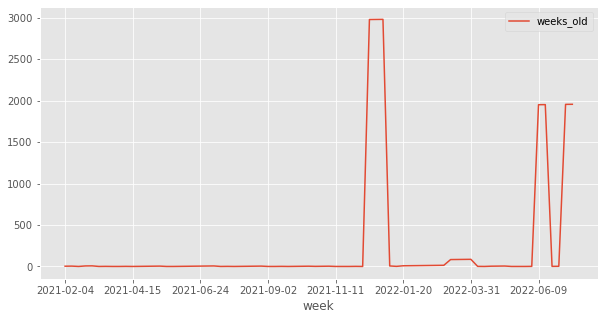

In [91]:
# Make your line plot here.
top_us.reset_index().plot(kind='line', x = 'week', y = 'weeks_old', figsize=(10, 5))

<!-- END QUESTION -->



Since some songs are thousands of weeks old, plotting all the data together makes it hard to tell what the trends are for newer songs. To better see what's going on near 0 on the y-axis, we'll "clip", or chop off, the y-axis so that the oldest songs appear to only be 26 weeks (half a year) old.

We've done this for you. The plot we created is interactive, meaning that you can hover over any point on the line to see various pieces of information for each song. Try hovering over the line plot produced to see which songs were at the top of the charts each week, and how old they were when they got usurped by the next best thing.

<center><h3><a href="https://dsc-courses.github.io/dsc10-2022-fa/resources/midterm_project/q5-age-number-1.html">Access the plot by clicking here.</a></h3></center>

To test your understanding, see if you can answer these questions from the interactive plot:
 1. Why does the line plot shows a bunch of diagonal line segments? 
 2. Why do some diagonal line segments start at the horizontal axis, and others don't?
 3. Why does the line plot you made in Question 5.7 have three large spikes, while this one has four?
 4. How many different #1 songs were over 26 weeks old? Why did these songs become super popular? (You may have to do some research.)

You don't have to turn in your answers to the questions above, but you should figure out how to answer them.

<a id='section6'></a>

## Section 6: Party in the USA 💃

<small>(<a href="#outline">return to the outline</a>)</small>

We concluded Section 5 by looking at the age of the #1 song each week in the US. Let's continue our analysis of the songs that became extremely popular in the US.

Define a **US megahit** to be a song that has met all of the following criteria **in the US**:
- Has been at position 1 or 2 in the top 200 at some point.
- Spent at least 20 weeks in the top 200.
- Had a streak of at least 5 consecutive weeks of being in the top 10.

In this section, we'll work towards determining which songs fit this criteria, and in the next (and final!) section, we'll see how these songs stand apart from the rest musically.

**Question 6.1.** To start, create a DataFrame called `us_charts` with only one row for each week and each rank. That is, remove duplicate entries for songs with multiple artists. Keep only the `'track_name'`, `'artist_names'`, `'rank'`, and `'week'` columns, in that order.

Arrange the rows chronologically by week, and within each week, in ascending order of rank. Don't forget that we're only using data from the US.

*Hint*: `us_charts` should have a multiple of 200 rows, since there are 200 songs on the top 200 each week.

In [92]:
us_charts = charts[charts.get('country') == 'United States']
# only one row for each week and each rank
us_charts = us_charts.groupby(['week', 'rank']).max().reset_index()
us_charts = us_charts.get(['track_name', 'artist_names', 'rank', 'week'])
# remove duplicate rows of songs with multiple artists
us_charts

,track_name,artist_names,rank,week
0,drivers license,Olivia Rodrigo,1,2021-02-04
1,Good Days,SZA,2,2021-02-04
2,Streets,Doja Cat,3,2021-02-04
3,Save Your Tears,The Weeknd,4,2021-02-04
4,Whoopty,CJ,5,2021-02-04
...,...,...,...,...
15195,Get Into It (Yuh),Doja Cat,196,2022-07-14
15196,Fancy Like,Walker Hayes,197,2022-07-14
15197,Stick Season,Noah Kahan,198,2022-07-14
15198,Call Out My Name,The Weeknd,199,2022-07-14


In [93]:
grader.check("q6_1")

q6_1 results: All test cases passed!

**Question 6.2.** How many distinct weeks was data collected for? Store your answer as an `int` in the variable `num_weeks`.

In [94]:
num_weeks = len(us_charts.get('week').unique())
num_weeks

76

In [95]:
grader.check("q6_2")

q6_2 results: All test cases passed!

**Question 6.3.** Rather than have the week listed as a date, we'd like to simply record it as a week number, between 1 and `num_weeks` (inclusive). For instance, since `'2021-02-18'` is the third week for which we have charts data, it is week number 3. 

Add a column called `'week_num'` to `us_charts` that contains the week number for each week.

*Hint*: With the functions [`np.repeat`](https://numpy.org/doc/stable/reference/generated/numpy.repeat.html) and `np.arange`, you can do this in one line of code.

In [96]:
weeks_series = np.array(us_charts.get('week').unique())
array_of_weeks = np.arange(1, num_weeks+1)
week_numbers = np.repeat(array_of_weeks, 200)
us_charts = us_charts.assign(week_num = week_numbers)
us_charts
#weeks_series, array_of_weeks, week_num

,track_name,artist_names,rank,week,week_num
0,drivers license,Olivia Rodrigo,1,2021-02-04,1
1,Good Days,SZA,2,2021-02-04,1
2,Streets,Doja Cat,3,2021-02-04,1
3,Save Your Tears,The Weeknd,4,2021-02-04,1
4,Whoopty,CJ,5,2021-02-04,1
...,...,...,...,...,...
15195,Get Into It (Yuh),Doja Cat,196,2022-07-14,76
15196,Fancy Like,Walker Hayes,197,2022-07-14,76
15197,Stick Season,Noah Kahan,198,2022-07-14,76
15198,Call Out My Name,The Weeknd,199,2022-07-14,76


In [97]:
grader.check("q6_3")

q6_3 results: All test cases passed!

**Question 6.4.** Our first criteria for a US megahit was that the song has been at position 1 or 2 in the top 200 in the United States at some point. Create an array of the `'track_name'`s of all such songs, without duplicates, and save it as `been_top_two`.

In [98]:
top_2_unique = us_charts[(us_charts.get('rank') == 1) | (us_charts.get('rank') == 2)].get('track_name')

been_top_two = np.unique(np.array([top_2_unique]))
been_top_two

array(['All I Want for Christmas Is You',
       "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)",
       'As I Am (feat. Khalid)', 'As It Was', 'Calling My Phone',
       'Die Hard', 'Easy On Me', 'First Class',
       'Girls Want Girls (with Lil Baby)', 'Glimpse of Us', 'Good Days',
       'Heat Waves', 'Hurricane', 'I Hate U',
       'INDUSTRY BABY (feat. Jack Harlow)',
       'Jimmy Cooks (feat. 21 Savage)', 'Jingle Bell Rock',
       'Kiss Me More (feat. SZA)',
       'Knife Talk (with 21 Savage ft. Project Pat)',
       'Late Night Talking', 'MONTERO (Call Me By Your Name)',
       'Moscow Mule', 'N95', 'One Right Now (with The Weeknd)',
       'Peaches (feat. Daniel Caesar & Giveon)', 'RAPSTAR',
       "Rockin' Around The Christmas Tree",
       'Running Up That Hill (A Deal With God) - 2018 Remaster',
       'STAY (with Justin Bieber)', 'Sacrifice', 'Save Your Tears',
       'Smokin Out The Window', 'Super Gremlin',
       'Wants and Needs (feat. Lil Baby)

In [99]:
grader.check("q6_4")

q6_4 results: All test cases passed!

Below, we check that none of the songs in `been_top_two` have the same `'track_name'` but different `'artist_names'` as another song in `us_charts`. 

In [100]:
# You don't need to edit this code, but you should understand how it works.
def diff_artists(track_name):
    '''Return the number of distinct 'artist_names' associated with a given track_name in us_charts.'''
    song_only = us_charts[us_charts.get('track_name') == track_name]
    return song_only.groupby('artist_names').count().shape[0]

num_diff_artists = np.array([])
for song in been_top_two:
    num_diff_artists = np.append(num_diff_artists, diff_artists(song))
max(num_diff_artists)

1.0

Since this set of songs doesn't have the potential for confusion with other songs with the same `'track_name'`, we can safely refer to these songs by their `'track_name'` for the remainder of this section (instead of having to also worry about their `'artist_names'`).

**Question 6.5.** Create a DataFrame called `possibly_mega` with the same columns as `us_charts`, but with only the rows of `us_charts` where the `'track_name'` is in `been_top_two`.

*Hints*: 
- Add a new column to filter by, then drop it after filtering (i.e. after Boolean indexing).
- Use the Python keyword `in` to determine whether a specific song name is in `been_top_two`.

In [101]:
def in_charts(track):
    if track in been_top_two:
        return True
    else:
        return False

possibly_mega = us_charts.assign(new_col = us_charts.get('track_name').apply(in_charts))
possibly_mega = possibly_mega[possibly_mega.get('new_col') == True].drop(columns=['new_col'])
possibly_mega

,track_name,artist_names,rank,week,week_num
0,drivers license,Olivia Rodrigo,1,2021-02-04,1
1,Good Days,SZA,2,2021-02-04,1
3,Save Your Tears,The Weeknd,4,2021-02-04,1
25,Heat Waves,Glass Animals,26,2021-02-04,1
200,drivers license,Olivia Rodrigo,1,2021-02-11,2
...,...,...,...,...,...
15137,drivers license,Olivia Rodrigo,138,2022-07-14,76
15151,RAPSTAR,Polo G,152,2022-07-14,76
15163,One Right Now (with The Weeknd),"Post Malone, The Weeknd",164,2022-07-14,76
15170,Save Your Tears,The Weeknd,171,2022-07-14,76


In [102]:
grader.check("q6_5")

q6_5 results: All test cases passed!

**Question 6.6.** Our second criteria for a US megahit was that the song spent at least 20 weeks on the top 200 in the US.

Create a function called `calculate_weeks` that takes as input the `'track_name'` of a song in `possibly_mega` and returns the number of weeks the song spent on the top 200 charts in the US (during the period of data collection). Then `apply` the function to the `possibly_mega` DataFrame and add a column to `possibly_mega` called `'weeks_on_charts'` with this information. 

In [103]:
def calculate_weeks(track_name):
    # count number of instances for a song
    num_instances = possibly_mega[possibly_mega.get('track_name') == track_name].shape[0]
    return num_instances

possibly_mega = possibly_mega.assign(weeks_on_charts = possibly_mega.get('track_name').apply(calculate_weeks))
possibly_mega

,track_name,artist_names,rank,week,week_num,weeks_on_charts
0,drivers license,Olivia Rodrigo,1,2021-02-04,1,76
1,Good Days,SZA,2,2021-02-04,1,71
3,Save Your Tears,The Weeknd,4,2021-02-04,1,74
25,Heat Waves,Glass Animals,26,2021-02-04,1,76
200,drivers license,Olivia Rodrigo,1,2021-02-11,2,76
...,...,...,...,...,...,...
15137,drivers license,Olivia Rodrigo,138,2022-07-14,76,76
15151,RAPSTAR,Polo G,152,2022-07-14,76,66
15163,One Right Now (with The Weeknd),"Post Malone, The Weeknd",164,2022-07-14,76,36
15170,Save Your Tears,The Weeknd,171,2022-07-14,76,74


In [104]:
grader.check("q6_6")

q6_6 results: All test cases passed!

Our third second criteria for a US megahit was that the song had a streak of at least 5 consecutive weeks of being in the top 10 on the charts in the US.

In order to identify these songs, we'll need to be able to calculate, for a given song, the longest streak of consecutive weeks spent in the top 10. The next few questions will help us get there.

**Question 6.7. ⭐️⭐️** Write a function called `calculate_rank_array` that takes as input the `'track_name'` of a song in `possibly_mega` and returns an array of that song's ranks for each week of data collection. The array should be of length `num_weeks` for every possible input song, regardless of whether the song actually appeared in the top 200 for all weeks. If the song is not on the chart in a given week, substitute 201 for its rank that week.

For example, `'As It Was'` by `'Harry Styles'` first appeared in the top 200 in week 62. As a result, the first 61 elements of `calculate_rank_array('As It Was')` should be 201. In weeks 62 through 65, it was at positions 1, 2, 1, and 1, so those should be the next four elements in `calculate_rank_array('As It Was')`. The full expected output of `calculate_rank_array('As It Was')` is given below.

```py
>>> calculate_rank_array('As It Was')
array([201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201., 201., 201., 201., 201., 201.,
       201., 201., 201., 201., 201., 201.,   1.,   2.,   1.,   1.,   1.,
         3.,   5.,   1.,   1.,   2.,   3.,   3.,   4.,   3.,   3.])
```

*Hint*: Our solution uses a `for`-loop and the `in` keyword.

In [105]:
def calculate_rank_array(track_name):
    rank_array = np.array([])
    weeks = possibly_mega[possibly_mega.get('track_name') == track_name].get(['track_name', 'rank', 'week_num'])
    
    for week in range(1, 77):
        # get the rank of the week if its charted
        if week in np.array(weeks.get('week_num')):
            rank_array = np.append(rank_array, weeks.set_index('week_num').get('rank').loc[week])
        else:
            # otherwise append 201
            rank_array = np.append(rank_array, 201)
            
    return rank_array

calculate_rank_array('Good Days'), calculate_rank_array('drivers license')

(array([  2.,   3.,   4.,   4.,   5.,   9.,   9.,  14.,  14.,  14.,  19.,
         20.,  19.,  21.,  22.,  35.,  40.,  38.,  42.,  49.,  47.,  75.,
         62.,  57.,  58.,  60.,  81.,  67.,  70.,  81., 100., 113.,  96.,
         97.,  74.,  82.,  87.,  96.,  85.,  85.,  84., 132., 132.,  95.,
         65., 102., 122., 118.,  74.,  92.,  81.,  78.,  90.,  93., 109.,
        104.,  92., 101., 120., 124., 134., 113., 123., 135., 141., 160.,
        201., 201., 201., 201., 201., 176., 188., 184., 188., 200.]),
 array([  1.,   1.,   2.,   1.,   1.,   5.,   3.,   9.,   8.,  11.,  14.,
         14.,  17.,  17.,  17.,  26.,   7.,   8.,  11.,  13.,  16.,  32.,
         22.,  24.,  21.,  25.,  35.,  27.,  28.,  33.,  57.,  66.,  54.,
         55.,  50.,  47.,  51.,  62.,  60.,  61.,  69., 117.,  92.,  66.,
         45.,  69.,  95.,  90.,  51.,  77.,  75.,  81.,  81.,  87., 101.,
         95.,  98.,  96.,  99., 102.,  76.,  45.,  50.,  56.,  69.,  81.,
        114., 128., 127., 135., 145., 147.

In [106]:
grader.check("q6_7")

q6_7 results: All test cases passed!

**Question 6.8.** Now, write a function called `longest_streak` that takes two inputs:
- `track_name`, the `'track_name'` of a song in `possibly_mega`.
- `n`, an integer between 1 and 200 (inclusive). By setting `n=10` in the parameter list, we make `n` an optional argument with 10 as its default value if omitted.

The function should return the largest number of consecutive weeks for which the given song ranked in the top `n` songs in the US.

For example, `longest_streak('As It Was', 3)` should evaluate to 6 because the song `'As It Was'` had a 6-week streak of being in the top 3 in the US, and no longer streak.

*Note*: We've completed a good chunk of the implementation of `longest_streak` for you. A big part of your job is to understand what the role of each variable is. You only need to add the body of the `for`-loop; our solution only adds 5 lines to what is below.

In [107]:
def longest_streak(track_name, n=10):
    rank_array = calculate_rank_array(track_name)
    longest = 0 
    current = 0 
    for num in rank_array:
        if (num <= n) & (current >= longest):
            current += 1
            longest += 1
        else:
            current = 0
    return max(longest, current)

# Test out your function. Feel free to change these inputs.
longest_streak('As It Was', 3), longest_streak('drivers license')

(6, 9)

In [108]:
grader.check("q6_8")

q6_8 results: All test cases passed!

**Question 6.9.** Add a column called `'longest_streak_top_ten'` to `possibly_mega` that contains, for each song, the longest number of consecutive weeks that the song spent in the top 10 in the US.

In [109]:
possibly_mega = possibly_mega.assign(longest_streak_top_ten = possibly_mega.get('track_name').apply(longest_streak))
possibly_mega

,track_name,artist_names,rank,week,week_num,weeks_on_charts,longest_streak_top_ten
0,drivers license,Olivia Rodrigo,1,2021-02-04,1,76,9
1,Good Days,SZA,2,2021-02-04,1,71,7
3,Save Your Tears,The Weeknd,4,2021-02-04,1,74,5
25,Heat Waves,Glass Animals,26,2021-02-04,1,76,3
200,drivers license,Olivia Rodrigo,1,2021-02-11,2,76,9
...,...,...,...,...,...,...,...
15137,drivers license,Olivia Rodrigo,138,2022-07-14,76,76,9
15151,RAPSTAR,Polo G,152,2022-07-14,76,66,6
15163,One Right Now (with The Weeknd),"Post Malone, The Weeknd",164,2022-07-14,76,36,1
15170,Save Your Tears,The Weeknd,171,2022-07-14,76,74,5


In [110]:
grader.check("q6_9")

q6_9 results: All test cases passed!

It took a lot of preparation, but now we can finally identify the songs that qualify as US megahits! As a reminder, we say a song is a US megahit if it has met all of the following criteria **in the US**:
- Has been at position 1 or 2 in the top 200 at some point.
- Spent at least 20 weeks in the top 200.
- Had a streak of at least 5 consecutive weeks of being in the top 10.

**Question 6.10.** Create a DataFrame called `us_megahits` that is indexed by `'track_name'`, has a single row for each song that qualifies as a US megahit, and has columns `'artist_names'`, `'weeks_on_charts'`, and `'longest_streak_top_ten'`.

In [111]:
us_megahits = possibly_mega[(possibly_mega.get('longest_streak_top_ten') >= 5) & (possibly_mega.get('weeks_on_charts') >= 20)].get(['track_name','artist_names', 'weeks_on_charts', 'longest_streak_top_ten']).groupby('track_name').min()
us_megahits

,artist_names,weeks_on_charts,longest_streak_top_ten
track_name,,,
Calling My Phone,"Lil Tjay, 6LACK",43,9
Easy On Me,Adele,35,8
Good Days,SZA,71,7
INDUSTRY BABY (feat. Jack Harlow),"Lil Nas X, Jack Harlow",51,6
Kiss Me More (feat. SZA),"Doja Cat, SZA",66,6
...,...,...,...
We Don't Talk About Bruno,"Carolina Gaitán - La Gaita, Mauro Castillo, Ad...",28,14
deja vu,Olivia Rodrigo,67,6
drivers license,Olivia Rodrigo,76,9


In [112]:
grader.check("q6_10")

q6_10 results: All test cases passed!

<a id='section7'></a>
## Section 7: Encore 🔂

<small>(<a href="#outline">return to the outline</a>)</small>

In this final section of the project, we'll analyze some of the audio features of US megahits. There's an issue, though: `us_megahits` doesn't contain any audio features. Fortunately, that information is available in `songs`, as we see below.

In [113]:
songs

,track_name,artist_names,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,tempo_name
1053,Jesus Lord pt 2,Kanye West,0.524,0.7260,8.0,1.0,-6.628,0.0941,0.07050,0.019200,0.0877,0.146,107.400,11.512200,Adante
125,All Too Well (10 Minute Version) (Taylor's Ver...,Taylor Swift,0.631,0.5180,0.0,1.0,-8.771,0.0303,0.27400,0.000000,0.0880,0.205,93.023,10.217117,Adante
1784,SWEET / I THOUGHT YOU WANTED TO DANCE (feat. B...,"Tyler, The Creator, Brent Faiyaz, Fana Hues",0.468,0.6520,0.0,1.0,-4.912,0.0722,0.33300,0.000318,0.5500,0.390,140.223,9.802317,Allegro
1052,Jesus Lord,Kanye West,0.477,0.7130,1.0,1.0,-6.805,0.1260,0.09840,0.008440,0.0879,0.113,106.137,8.975617,Adante
1719,"Residente: Bzrp Music Sessions, Vol. 49","Bizarrap, Residente",0.586,0.7400,1.0,0.0,-2.997,0.4040,0.55500,0.000000,0.1100,0.697,71.378,8.654817,Adagio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Bezos I,Bo Burnham,0.694,0.9480,2.0,1.0,-5.307,0.0361,0.00936,0.000016,0.1390,0.705,115.044,0.969150,Moderato
189,BLESSED,"Tyler, The Creator",0.336,0.6130,8.0,1.0,-7.869,0.1230,0.38900,0.000100,0.7650,0.741,40.319,0.961117,Lento
575,Donda Chant,Kanye West,0.702,0.0474,3.0,0.0,-15.198,0.5260,0.00516,0.000001,0.1470,0.175,102.983,0.867700,Adante
836,Good News,Pop Smoke,0.573,0.5040,10.0,1.0,-8.116,0.2190,0.23600,0.000000,0.1200,0.526,126.655,0.783217,Allegro


**Question 7.1.** Create a DataFrame called `megahits` that contains the same rows and columns as `us_megahits`, plus the additional columns below.
- `'danceability'`
- `'energy'`
- `'key'`
- `'mode'`
- `'loudness'`
- `'speechiness'`
- `'acousticness'`
- `'instrumentalness'`
- `'liveness'`
- `'valence'`
- `'tempo'`
- `'duration_min'`

`megahits`, like `us_megahits`, should be indexed by `'track_name'`.

In [114]:
megahits = us_megahits.merge(songs, on = 'artist_names').groupby('track_name').min().drop(columns=['tempo_name'])
megahits

,artist_names,weeks_on_charts,longest_streak_top_ten,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min
track_name,,,,,,,,,,,,,,,
"1 step forward, 3 steps back",Olivia Rodrigo,61,6,0.473,0.203,2.0,1.0,-12.627,0.1020,0.94100,0.000000,0.1260,0.4190,168.884,2.726450
21,Polo G,66,6,0.783,0.479,7.0,1.0,-10.646,0.5410,0.14900,0.000000,0.1010,0.5330,176.027,2.729967
A Tale By Quincy,The Weeknd,74,5,0.447,0.513,5.0,0.0,-8.670,0.1270,0.67900,0.000030,0.0960,0.5720,67.289,1.603867
All I Ask,Adele,35,8,0.591,0.280,4.0,1.0,-5.494,0.0283,0.88900,0.000000,0.1240,0.3480,141.916,4.530000
All Night Parking (with Erroll Garner) Interlude,Adele,35,8,0.734,0.497,8.0,1.0,-9.666,0.1660,0.67000,0.000023,0.1940,0.3070,127.989,2.697150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
happier,Olivia Rodrigo,61,6,0.395,0.443,6.0,1.0,-9.720,0.1330,0.76500,0.000010,0.0839,0.3380,168.924,2.932217
hope ur ok,Olivia Rodrigo,61,6,0.443,0.298,0.0,1.0,-12.181,0.0644,0.38800,0.000010,0.1030,0.1720,77.253,3.492667
"jealousy, jealousy",Olivia Rodrigo,61,6,0.695,0.575,10.0,0.0,-6.334,0.1160,0.19800,0.000000,0.0614,0.6990,163.929,2.886000


In [115]:
grader.check("q7_1")

q7_1 results: All test cases passed!

**Question 7.2. ⭐️⭐️** Create a DataFrame named `megahit_comparison` that is indexed by `'audio_feature'` and contains the values given in the `audio_features` array below. Each row of `megahit_comparison` will therefore correspond to a different audio feature. `megahit_comparison` should have two columns:
- `'every_song_mean'` should contain the mean value of each feature, among all songs in `songs`.
- `'megahit_mean'` should contain the mean value of each feature, among all songs in `megahits`.

In [116]:
audio_features = np.array(['danceability', 'energy', 'speechiness', 'acousticness',
                      'instrumentalness', 'liveness', 'valence', 'loudness', 'tempo', 'duration_min'])

megahits_iterator = np.repeat(0.0, 10)
songs_iterator = np.repeat(0.0, 10)

for i in np.arange(10):
    megahits_iterator[i] = megahits.get(audio_features[i]).mean()
    songs_iterator[i] = songs.get(audio_features[i]).mean()
    
megahit_comparison = bpd.DataFrame().assign(audio_feature=audio_features).assign(every_song_mean=songs_iterator, megahit_mean=megahits_iterator).set_index('audio_feature')
megahit_comparison


,every_song_mean,megahit_mean
audio_feature,,
danceability,0.667982,0.605309
energy,0.612003,0.556278
speechiness,0.117917,0.117380
acousticness,0.267516,0.321491
instrumentalness,0.012049,0.002216
liveness,0.179257,0.161547
valence,0.520207,0.404648
loudness,-6.738406,-7.378485
tempo,121.889499,125.313320


In [117]:
grader.check("q7_2")

q7_2 results: All test cases passed!

**Question 7.3.** Finally, draw a horizontal bar chart showing the differences between megahits and all songs in each of the **first 7 features** in `audio_features`. These are the audio features that are measured on a 0 to 1 scale. As with the bar charts you made in Section 4, arrange the bars so that the top bar represents the audio feature which most distinguishes megahits from the rest of the songs on the top 200 charts. Make sure to give your plot an appropriate title.

*Hint*: Adapt the code you wrote in the `word_analysis` function.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q7_3
manual: true
-->

<AxesSubplot:title={'center':'Audio Feature Comparison of US Megahits vs Rest of Songs on Spotify Top 200'}, ylabel='audio_feature'>

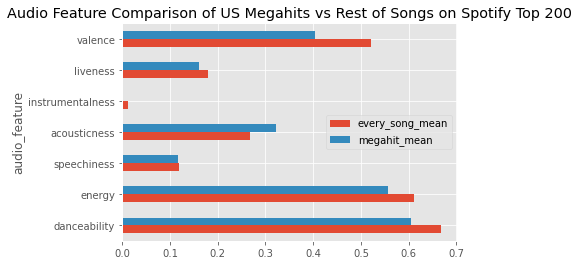

In [118]:
# Make your horizontal bar chart here.
megahit_comparison.take(np.arange(7)).plot(kind='barh', title='Audio Feature Comparison of US Megahits vs Rest of Songs on Spotify Top 200' )

<!-- END QUESTION -->



Were these results what you expected to see? Of course, with music trends changing over time, the characteristics of a megahit are likely to change as well. It would be interesting to repeat this analysis with weekly top 200 charts from other time periods, or in other countries.

Keep in mind that we're also comparing megahits to other popular songs, as all of our data comes from the top 200 charts. Given a broader dataset of songs, we'd likely see a stronger characterization of a megahit, as megahits would likely have a more pronounced difference from all songs when more "unpopular" songs are included.

## Parting Thoughts 💭

While you've made it to the end of the project, we've only just scratched the surface in analyzing the `charts` dataset. We encourage you to explore the dataset further by asking and answering your own questions about the Spotify charts. For instance, we didn't use the `'streams'` column in `charts` at all. Maybe you're interested in looking at the number of streams per week for your favorite song. Or maybe you're interested in recreating the interactive plot from the end of Section 5, but instead of looking at the age of each weekly #1 song, you want to look at the number of streams of each week #1 song. Explore, and let us know what you find!

<a id='emojiquiz'></a>

## Emoji Quiz 💯

Just for fun, here are some emojis that describe particular songs or artists. See how many you can identify! You may have come across some of these songs or artists while completing this project. 

We'll post the answers on EdStem after the project is due. 

### Songs

1. 🚘🆔
2. ✋🐕‍🦺
3. 👨‍🚀➡🌊
4. 👵👴🏽💭👧👦🏽
5. 💍💍💍💍💍💍💍
6. 📷🖼️
7. 🏃‍♀️⬆️⛰️
8. 🕺🐵
9. 🧨🎆
10. 🍉🍭
11. ⚠️☠️

### Artists

1. 🥛🐘🦓🦎
2. 🤿🐺
3. 🔴🕔
4. 🌶️🌶️🌶️
5. 2️⃣👄
6. 👎🐇
7. Ⓜ️➕Ⓜ️
8. 🥶▶️
9. ♂️ 🦆
10. ⚫🐻
11. ‼️🕺🎶

## Congratulations! You've completed the Midterm Project!

As usual, follow these steps to submit your assignment:

1. Select Kernel -> Restart & Run All to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using File -> Download as -> Notebook (.ipynb), then upload your notebook to Gradescope. Don't forget to add your partner to your group on Gradescope!

If running all the tests at once causes a test to fail that didn't fail when you ran the notebook in order, check to see if you changed a variable's value later in your code. Make sure to use new variable names instead of reusing ones that are used in the tests. 

Remember, the tests here and on Gradescope just check the format of your answers. We will run correctness tests after the due date has passed.

In [119]:
grader.checkall()

q1_1 results: All test cases passed!

q1_10 results: All test cases passed!

q1_2 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q1_8 results: All test cases passed!

q1_9 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_6 results: All test cases passed!

q3_7 results: All test cases passed!

q3_8 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!

q4_6 results: All test cases passed!

q4_7 results: All test cases passed!

q4_8 result